# Step 0: Importing all necessary libraries and loading the dataset

- <hp style="color: aqua;">Importing libraries</p>

In [231]:
# Importing the essential libraries for data analysis and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')

- <p style="color: aqua;">Loading Dataset</p>

In [232]:
# Loading the dataset from a CSV file
movies = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `info`
- `head` and `tail`
- `describe`

- <p style="color: aqua;">Shape of the data.</p>

In [233]:
# Displaying the dimensions of the dataset
# 'movies.shape' returns a tuple representing the number of rows and columns
print(f'Dimension of dataset: {movies.shape}')

# Extracting and printing the number of rows and columns separately
# 'movies.shape[0]' gives the number of rows
# 'movies.shape[1]' gives the number of columns
print(f'Number of rows are: {movies.shape[0]}, and number of columns are: {movies.shape[1]}')

Dimension of dataset: (1000, 9)
Number of rows are: 1000, and number of columns are: 9


- <p style="color: aqua;"> Info of the data</p>

In [234]:
# Displaying a summary of the dataset
# The 'info()' method provides information about the DataFrame including
# the number of non-null entries, column data types, and memory usage
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   Movie Name          1000 non-null   object 
 2   Year of Release     1000 non-null   object 
 3   Watch Time          1000 non-null   int64  
 4   Movie Rating        1000 non-null   float64
 5   Metascore of movie  845 non-null    float64
 6   Gross               838 non-null    object 
 7   Votes               1000 non-null   object 
 8   Description         1000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


<h5 style="color: salmon;">Summary based on the output of 'movies.info()'</h5>

+ The dataset consists of 1000 rows and 9 columns.
+ Data types include:
  + 2 integer columns
  + 2 float columns
  + 5 object columns
+ Seven columns have no missing values.
+ 'Metascore of movie' and 'Gross' columns have missing data.
+ The dataset uses approximately 70.4 KB of memory.


- <p style="color: aqua;">Head and tail</p>

In [235]:
# Displaying the first 5 rows of the dataset
print("First 5 rows:")
movies.head(5)

First 5 rows:


,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...


In [236]:
# Displaying the last 5 rows of the dataset
print("Last 5 rows:")
movies.tail(5)

Last 5 rows:


,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."
999,999,Celda 211,2009,113,7.6,NaN,NaN,"69,464",The story of two men on different sides of a p...


- <p style="color: aqua;">Description of the data</p>

In [237]:
# Displaying basic statistics of the dataset
print("Basic statistics:")
movies.describe(include='all')

Basic statistics:


,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
count,1000.000000,1000,1000,1000.000000,1000.000000,845.000000,838,1000,1000
unique,NaN,997,123,NaN,NaN,NaN,729,997,1000
top,NaN,Drishyam 2,2014,NaN,NaN,NaN,0.01,"36,804","Over the course of several years, two convicts..."
freq,NaN,2,28,NaN,NaN,NaN,8,2,1
mean,499.500000,NaN,NaN,124.253000,7.970200,79.011834,NaN,NaN,NaN
std,288.819436,NaN,NaN,28.800355,0.275732,11.973800,NaN,NaN,NaN
min,0.000000,NaN,NaN,45.000000,7.600000,28.000000,NaN,NaN,NaN
25%,249.750000,NaN,NaN,103.000000,7.800000,71.000000,NaN,NaN,NaN
50%,499.500000,NaN,NaN,120.000000,7.900000,80.000000,NaN,NaN,NaN
75%,749.250000,NaN,NaN,139.000000,8.100000,88.000000,NaN,NaN,NaN


In [238]:
# Displaying the list of column names in the dataset
print("Columns:")
print(movies.columns.tolist())

Columns:
['Unnamed: 0', 'Movie Name', 'Year of Release', 'Watch Time', 'Movie Rating', 'Metascore of movie', 'Gross', 'Votes', 'Description']


# Step 2: Data Preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

- <p style="color: aqua;">Dropping irrelevant columns and rows</p>

In [239]:
# Dropping unnecessary columns from the dataset
# 'Unnamed: 0' and 'Description' columns are removed using the 'drop()' method
# 'axis=1' specifies that columns (not rows) are to be dropped
# 'inplace=True' means the changes are made directly to the original DataFrame
movies.drop(['Unnamed: 0', 'Description'], axis=1, inplace=True)

# Displaying the updated dataset to verify the changes
movies

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378"
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588"
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087"
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886"
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211"
...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336"
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004"
997,Shine,1996,105,7.6,87.0,35.81,"55,589"
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822"


In [240]:
# Function to normalize movie titles
# This function performs several text cleaning operations:
# 1. Converts the title to a string, strips leading/trailing spaces, and converts to lowercase
# 2. Replaces multiple spaces with a single space
# 3. Replaces underscores and hyphens with spaces
# 4. Removes any non-alphanumeric characters (except spaces)
def normalize_title(title):
    title = str(title).strip().lower() # Convert to string, strip spaces, convert to lowercase
    title = re.sub(r'\s+', ' ', title) # Replace multiple spaces with a single space
    title = re.sub(r'[_\-]', ' ', title) # Replace underscores and hyphens with spaces
    title = re.sub(r'[^\w\s]', '', title) # Remove non-alphanumeric characters (except spaces)
    return title

# Applying the normalization function to the 'Movie Name' column
# The result is stored in a new column 'Movie Name Normalized'
movies['Movie Name Normalized'] = movies['Movie Name'].apply(normalize_title)

- <p style="color: aqua;">Identifying duplicated columns</p>

In [241]:
# Check for duplicates in the normalized movie titles
duplicates = movies[movies.duplicated(subset=['Movie Name Normalized'], keep=False)]

# Display duplicates if found, with 'Movie Name Normalized' as the first column
if not duplicates.empty:
    print("Duplicates found:")
    # Ensure 'Movie Name Normalized' is the first column in the display
    columns_order = ['Movie Name Normalized'] + [col for col in movies.columns if col not in ['Movie Name', 'Movie Name Normalized']]
    print(duplicates[columns_order])
else:
    print("No duplicates found in the normalized movie titles.")

Duplicates found:
    Movie Name Normalized Year of Release  Watch Time  Movie Rating  \
90             drishyam 2            2021         152           8.4   
102              scarface            1983         170           8.3   
139              drishyam            2013         160           8.3   
179            drishyam 2            2022         140           8.2   
189              drishyam            2015         163           8.2   
905              scarface            1932          93           7.7   

     Metascore of movie Gross     Votes  
90                  NaN   NaN    39,387  
102                65.0  45.6  8,76,738  
139                 NaN   NaN    42,884  
179                 NaN   NaN    39,024  
189                 NaN  0.74    89,690  
905                90.0   NaN    29,289  


In [242]:
# Display unique 'Movie Name Normalized' entries and their associated years
duplicate_analysis = movies[movies['Movie Name Normalized'].duplicated(keep=False)]

# Group by the normalized movie name and list all unique years for each
duplicate_summary = duplicate_analysis.groupby('Movie Name Normalized')['Year of Release'].unique()

# Print the summary to analyze if years differ for the same movie name
print("Summary of normalized movie names with their release years:")
print(duplicate_summary)

# Check if there are any multiple years for the same normalized movie name
for movie_name, years in duplicate_summary.items():
    if len(years) > 1:
        print(f"The normalized movie name '{movie_name}' corresponds to multiple years: {years}")
    else:
        print(f"The normalized movie name '{movie_name}' corresponds to a single year: {years}")


Summary of normalized movie names with their release years:
Movie Name Normalized
drishyam      [2013, 2015]
drishyam 2    [2021, 2022]
scarface      [1983, 1932]
Name: Year of Release, dtype: object
The normalized movie name 'drishyam' corresponds to multiple years: ['2013' '2015']
The normalized movie name 'drishyam 2' corresponds to multiple years: ['2021' '2022']
The normalized movie name 'scarface' corresponds to multiple years: ['1983' '1932']


<h5 style="color: salmon;">Conclusion on Duplicate Movie Names</h5>

The analysis of normalized movie names reveals the following:

- **'drishyam'** corresponds to multiple release years: 2013 and 2015.
- **'drishyam 2'** corresponds to multiple release years: 2021 and 2022.
- **'scarface'** corresponds to multiple release years: 1983 and 1932.

**Conclusion:** The duplicate movie names in the dataset correspond to different movies, as indicated by varying release years.


In [243]:
# Check if there are any duplicated rows in the dataset
# 'duplicated()' method identifies duplicate rows
# 'any()' method returns True if there are any duplicates, otherwise False
dup_data = movies.duplicated().any()

# Print the result
# This line outputs whether there are any duplicated rows in the dataset
print(f"Are there any duplicated values in the dataset? {dup_data}")

Are there any duplicated values in the dataset? False


**Conclusion:** <h5 style="color: salmon;">The dataset does not contain any duplicated rows.</h5>

In [244]:
# Drop the temporary column after checking for duplicates
movies.drop(columns=['Movie Name Normalized'], inplace=True)

movies.columns

Index(['Movie Name', 'Year of Release', 'Watch Time', 'Movie Rating',
       'Metascore of movie', 'Gross', 'Votes'],
      dtype='object')

- <p style="color: aqua;">Renaming Columns</p>

In [245]:
# Renaming columns in the dataset for clarity and consistency
# The 'rename()' method is used to update column names
# 'columns' parameter specifies the mapping of old column names to new ones
movies = movies.rename(columns={
    'Movie Name': 'Title',
    'Year of Release': 'Released_Year',
    'Watch Time': 'Runtime',
    'Movie Rating': 'IMDB_Rating',
    'Metascore of movie': 'Metascore',
    'Votes': 'No_of_Votes'
})

# Display the updated dataset with renamed columns
movies

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378"
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588"
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087"
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886"
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211"
...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336"
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004"
997,Shine,1996,105,7.6,87.0,35.81,"55,589"
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822"


In [246]:
# Display the data types of each column in the dataset
# 'dtypes' attribute provides information about the data type of each column
movies.dtypes

Title             object
Released_Year     object
Runtime            int64
IMDB_Rating      float64
Metascore        float64
Gross             object
No_of_Votes       object
dtype: object

<h5 style="color: salmon;">Data Types Summary</h5>

- **Title:** object (string)
- **Released_Year:** object (string)
- **Runtime:** int64 (integer)
- **IMDB_Rating:** float64 (floating-point number)
- **Metascore:** float64 (floating-point number)
- **Gross:** object (string)
- **No_of_Votes:** object (string)

**Conclusion:**
- The 'Title', 'Released_Year', 'Gross', and 'No_of_Votes' columns are of type `object`, indicating they contain strings or mixed data types. 
- The 'Released_Year' column, in particular, is of type `object` but should ideally be numeric for proper analysis.
- Columns 'Runtime', 'IMDB_Rating', and 'Metascore' are correctly set as numeric types (`int64` and `float64`), suitable for numerical operations.

**Action Points:**
- Convert 'Released_Year' to a numeric type for consistency and analysis.
- Review the 'Gross' and 'No_of_Votes' columns for potential conversion to numeric types if needed.


- <p style="color: aqua;">Converting Columns in proper data types</p>

In [247]:
# Filter rows where 'Released_Year' column contains non-numeric values
# '~' operator is used to invert the boolean mask returned by 'str.isnumeric()'
# 'str.isnumeric()' checks if the 'Released_Year' values are numeric strings
non_numeric_years = movies[~movies['Released_Year'].str.isnumeric()]

# Print the rows with non-numeric 'Released_Year' values
non_numeric_years

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes
59,96,II 2018,158,8.5,NaN,NaN,"33,646"
65,Joker,I 2019,122,8.4,59.0,335.45,"13,81,002"
77,Coco,I 2017,105,8.4,81.0,209.73,"5,46,380"
163,The Father,I 2020,97,8.2,88.0,132,"1,73,861"
232,Inside Out,I 2015,95,8.1,94.0,356.46,"7,46,886"
240,Spotlight,I 2015,129,8.1,93.0,45.06,"4,86,300"
244,Rush,I 2013,123,8.1,74.0,26.95,"4,95,815"
246,Room,I 2015,118,8.1,86.0,14.68,"4,35,564"
332,Pink,III 2016,136,8.1,NaN,1.24,"46,744"
350,The Revenant,I 2015,156,8.0,76.0,183.64,"8,36,807"


In [248]:
# Count the number of non-numeric values in the 'Released_Year' column
# Filter rows where 'Released_Year' contains non-numeric values
# 'shape[0]' returns the number of rows in the filtered DataFrame
non_numeric_count = movies[~movies['Released_Year'].str.isnumeric()].shape[0]

# Print the number of non-numeric values
# This line outputs the count of non-numeric values in the 'Released_Year' column
print(f"Number of non-numeric values in column 'Released_Year': {non_numeric_count}")


Number of non-numeric values in column 'Released_Year': 35


In [249]:
# Identify unique non-numeric values in the 'Released_Year' column
# Filter rows where 'Released_Year' contains non-numeric values
# 'unique()' method returns an array of unique values from the filtered DataFrame
non_numeric_values = movies[~movies['Released_Year'].str.isnumeric()]['Released_Year'].unique()

# Print the unique non-numeric values
# This line outputs the unique non-numeric values found in the 'Released_Year' column
print("Non-numeric values in column 'Released_Year':")
print(non_numeric_values)

Non-numeric values in column 'Released_Year':
['II 2018' 'I 2019' 'I 2017' 'I 2020' 'I 2015' 'I 2013' 'III 2016'
 'I 2014' 'I 2004' 'II 2016' 'I 2011' 'I 2001' 'I 2022' 'I 2008' 'I 2010'
 'I 2006' 'I 2007' 'II 2022' 'I 1995' 'I 1985' 'III 2018']


In [250]:
# Function to extract a year from a string
# 're.search(r'\d{4}', year_str)' looks for a 4-digit year in the string
# If a match is found, 'match.group()' returns the year as a string, which is then converted to an integer
# If no match is found, the function returns None
def extract_year(year_str):
    match = re.search(r'\d{4}', year_str)
    if match:
        return int(match.group())
    return None

# Apply the 'extract_year' function to the 'Released_Year' column
# This updates the 'Released_Year' column with extracted year values as integers
movies['Released_Year'] = movies['Released_Year'].apply(extract_year)

# Display the updated dataset with the extracted years
movies

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378"
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588"
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087"
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886"
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211"
...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336"
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004"
997,Shine,1996,105,7.6,87.0,35.81,"55,589"
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822"


In [251]:
# Display the unique values in the 'Released_Year' column
# 'unique()' method returns an array of unique values in the column
print(movies['Released_Year'].unique())

[1994 1972 2008 1993 1957 2003 1974 2023 2010 1999 2001 1966 2002 2021
 2022 2014 1990 1975 1980 2020 1995 1998 1991 1977 1997 1954 1946 1962
 2006 1985 2019 2000 1979 1988 2011 1960 1942 1968 1931 1936 2018 2012
 1981 1986 1984 1964 2016 2017 2009 1950 1940 1963 1992 1971 1983 2004
 1987 1958 1941 1952 1927 1959 1973 1961 1944 2007 1948 1921 2013 2005
 1989 1976 1982 1939 1965 1953 2015 1969 1955 1928 1924 1996 1978 1967
 1949 1934 1930 1926 1951 1925 1937 1920 1947 1945 1956 1922 1933 1970
 1938 1932 1943 1935]


<h5 style="color: salmon;">Summary of Unique Values in 'Released_Year'</h5>

- The 'Released_Year' column contains a range of years from 1920 to 2023.
- All values are valid numeric years, with no remaining string entries or NaN values.
- The column has been successfully cleaned and is now ready for further analysis.


In [252]:
# Create a new column 'decade' by calculating the decade for each release year
# 'np.floor(movies['Released_Year']/10) * 10' calculates the decade by dividing the year by 10, flooring the result, and then multiplying by 10
# 'astype(int)' converts the resulting values to integer type
movies['Decade'] = (np.floor(movies['Released_Year']/10) * 10).astype(int)

# Display the updated dataset with the new 'decade' column
movies

,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Decade
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378",1990
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588",1970
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",2000
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886",1990
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",1950
...,...,...,...,...,...,...,...,...
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",2010
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",2000
997,Shine,1996,105,7.6,87.0,35.81,"55,589",1990
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822",1930


In [253]:
movies.dtypes

Title             object
Released_Year      int64
Runtime            int64
IMDB_Rating      float64
Metascore        float64
Gross             object
No_of_Votes       object
Decade             int32
dtype: object

In [254]:
# Display the unique values in the 'Gross' column
# 'unique()' method returns an array of unique values present in the 'Gross' column
print(movies['Gross'].unique())

['28.34' '134.97' '534.86' '96.9' '4.36' '377.85' '57.3' '15' '107.93'
 '292.58' '37.03' '315.54' '330.25' '6.1' '342.55' '219' nan '29' '188.02'
 '46.84' '112' '171.48' '290.48' '100.13' '216.54' '130.74' '204.84'
 '136.8' '322.74' '7.56' '10.06' '57.6' '0.27' '21' '47' '53.09' '210.61'
 '53.37' '187.71' '132.38' '78.9' '13.09' '19.5' '32.57' '23.34' '422.78'
 '6.72' '46' '13.18' '32' '1.02' '5.32' '36.76' '11.99' '0.02' '0.16'
 '25.54' '448.14' '190.24' '248.16' '162.81' '335.45' '858.37' '44.02'
 '85.16' '0.71' '678.82' '83.47' '51.97' '91' '0.28' '11.29' '5.02'
 '209.73' '223.81' '1.66' '6.53' '11.49' '62' '61' '8.18' '0.29' '87'
 '718.73' '75.6' '120.54' '67.44' '130.1' '3.64' '138.43' '56.95' '113'
 '2.83' '6.21' '45.6' '34.4' '0.69' '46.36' '191.8' '110' '293' '6.86'
 '44.82' '415' '33.23' '309.13' '2.38' '3.2' '1.59' '8.82' '1.24' '13.28'
 '7.1' '159.6' '18.6' '136' '12.39' '0.03' '0.06' '5.72' '1.22' '0.33'
 '6.6' '5.45' '0.9' '116.9' '206.85' '804.75' '74.28' '197.17' '128.01

<h5 style="color: salmon;">Summary of Unique Values in 'Gross' <h5>

- The 'Gross' column contains a variety of values representing movie revenues, including numeric values with different scales and precision (e.g., '0.02', '504.84', '1000').
- The column has entries formatted as strings, and it includes some NaN (missing) values.

**Conclusion:** The 'Gross' column is currently of type `object` due to the diverse formats of its values. It includes numeric revenue figures in various formats and also contains NaN values. Further steps should involve standardizing the data format and handling missing values before performing detailed analysis.

In [255]:
# Remove commas from the 'Gross' column to prepare for conversion to numeric
# The 'str.replace' method is used to replace commas with empty strings
movies['Gross'] = movies['Gross'].str.replace(',', '')

# Convert the 'Gross' column to numeric values, coercing errors to NaN
# 'pd.to_numeric' converts the column values to float, replacing non-numeric values with NaN
movies['Gross'] = pd.to_numeric(movies['Gross'], errors='coerce')

# Display the updated data types to confirm the conversion
print(movies.dtypes)

Title             object
Released_Year      int64
Runtime            int64
IMDB_Rating      float64
Metascore        float64
Gross            float64
No_of_Votes       object
Decade             int32
dtype: object


<h5 style="color: salmon;">Column Conversion Summary</h5>

**Conclusion:** The 'Gross' column has been successfully converted to the `float64` type, ensuring consistency in the representation of revenue data. The next step will be to convert the 'No_of_Votes' column to an appropriate numeric type for further analysis.

In [256]:
# Remove commas from the 'No_of_Votes' column to prepare for conversion to integer
# The 'str.replace' method is used to replace commas with empty strings
movies['No_of_Votes'] = movies['No_of_Votes'].str.replace(',', '')

# Convert the 'No_of_Votes' column to integer type
# 'astype(int)' converts the cleaned column values to integer type
movies['No_of_Votes'] = movies['No_of_Votes'].astype(int)

# Display the updated data types to confirm the conversion
movies.dtypes

Title             object
Released_Year      int64
Runtime            int64
IMDB_Rating      float64
Metascore        float64
Gross            float64
No_of_Votes        int32
Decade             int32
dtype: object

<h5 style="color: salmon;">Column Conversion Summary</h5>

- The 'Gross' column has been successfully converted to the `float64` type.
- The 'No_of_Votes' column has been successfully converted to the `int` type.
- The updated data types for the DataFrame are:
  - `Title`: object
  - `Released_Year`: int64
  - `Runtime`: int64
  - `IMDB_Rating`: float64
  - `Metascore`: float64
  - `Gross`: float64
  - `No_of_Votes`: int64
  - `decade`: int32

**Conclusion:** All columns have now been converted to their appropriate data types. The next step involves examining and addressing any missing values within the dataset to ensure the completeness and accuracy of the data before proceeding with further analysis.

- <p style="color: aqua;">Dealing with missing values</p>

In [257]:
# Calculate the number of missing values for each column
# 'isna().sum()' counts the NaN values in each column
missing_values = movies.isna().sum().reset_index()

# Rename the columns of the resulting DataFrame for clarity
missing_values.columns = ['columns', 'missing_counts']

# Display the DataFrame with missing values counts
missing_values

,columns,missing_counts
0,Title,0
1,Released_Year,0
2,Runtime,0
3,IMDB_Rating,0
4,Metascore,155
5,Gross,163
6,No_of_Votes,0
7,Decade,0


<h5 style="color: salmon;">Missing Values Summary</h5>

- The 'Metascore' column has 155 missing (NaN) values.
- The 'Gross' column has 163 missing (NaN) values.

**Conclusion:** The dataset has missing values in the 'Metascore' and 'Gross' columns.

In [258]:
# Calculate the number of missing values for each column in the 'movies' DataFrame
missvals = movies.isna().sum()
# Calculate the percentage of missing values for each column
misspct = (missvals / len(movies)) * 100
# Print a header for the missing values output
print('Missing Values (% of entries):')
# Print the percentage of missing values, rounded to 2 decimal places, and sorted in descending order
print(round(misspct.sort_values(ascending=False), 2))

Missing Values (% of entries):
Gross            16.3
Metascore        15.5
Title             0.0
Released_Year     0.0
Runtime           0.0
IMDB_Rating       0.0
No_of_Votes       0.0
Decade            0.0
dtype: float64


<h5 style="color: salmon;">Missing Values Summary:</h5>

- Metascore: 15.5% of values are missing.
- Gross: 16.3% of values are missing.
- Given the significant percentage of missing values in both columns, it is advisable to replace these values with appropriate alternatives rather than simply discarding them.

In [259]:
# Define the columns of interest for which we want to generate descriptive statistics
columns_of_interest = ['Metascore', 'Gross']

# Generate descriptive statistics for the specified columns
# The 'describe()' method provides summary statistics for the numeric columns
description = movies[columns_of_interest].describe()

# Print the descriptive statistics
print(description)

        Metascore       Gross
count  845.000000  837.000000
mean    79.011834   72.838017
std     11.973800  115.021621
min     28.000000    0.000000
25%     71.000000    3.330000
50%     80.000000   25.440000
75%     88.000000   96.900000
max    100.000000  936.660000


<h5 style="color: salmon;">Conclusion:</h5>

The `Metascore` column has a fairly normal distribution, with a mean of 79.01 and a range from 28.00 to 100.00. The median is close to the mean, suggesting a symmetrical distribution. Given the relatively normal distribution and the presence of a median value close to the mean, using the median to impute missing values would be appropriate. The median is less sensitive to extreme values and better represents the central tendency of the data, which helps in maintaining the balance of the distribution.

The `Gross` column exhibits a highly skewed distribution with a mean of 72.84 and a large standard deviation of 115.02. The minimum value is 0.00, indicating some films with no earnings, while the maximum value is significantly higher, suggesting a long tail with a few films generating very high earnings. The median is substantially lower than the mean, highlighting the presence of outliers. For the `Gross` column, a robust approach is needed due to its skewed distribution. Using the median for imputation is preferable over the mean because it is less affected by extreme values and better reflects the central tendency of the bulk of the data.

**Summary:**
- **Metascore:** Imputing missing values using the median to maintain the balance of a relatively normal distribution.
- **Gross:** Imputing missing values using the median to handle skewness and minimize the impact of outliers.

In [260]:
# Calculate the mean (average) of the 'Metascore' column
average_metascore = movies['Metascore'].mean()

# Display the calculated mean Metascore
average_metascore

79.01183431952663

In [261]:
# Replace missing values in the 'Metascore' column with the average Metascore value
movies['Metascore'] = movies['Metascore'].fillna(average_metascore)

In [262]:
# Check if there are any NaN values left in the 'Metascore' column
has_nan_metascore = movies['Metascore'].isnull().any()

# Print the result to indicate whether the 'Metascore' column contains NaN values
print(f"Does column 'Metascore' contain NaN values? {has_nan_metascore}")

Does column 'Metascore' contain NaN values? False


In [263]:
# Calculate the median value of the 'Gross' column
median_gross = movies['Gross'].median()

# Print the median value of the 'Gross' column
median_gross

25.44

In [264]:
# Fill missing values in the 'Gross' column with the median value
movies['Gross'] = movies['Gross'].fillna(median_gross)

In [265]:
# Count the number of NaN values in the 'Gross' column
num_nan_gross = movies['Gross'].isna().sum()

# Print the number of NaN values in the 'Gross' column
print(f"Number of NaN values in column 'Gross' is: {num_nan_gross}")

Number of NaN values in column 'Gross' is: 0


In [266]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Runtime        1000 non-null   int64  
 3   IMDB_Rating    1000 non-null   float64
 4   Metascore      1000 non-null   float64
 5   Gross          1000 non-null   float64
 6   No_of_Votes    1000 non-null   int32  
 7   Decade         1000 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(1)
memory usage: 54.8+ KB


<h5 style="color: salmon;">Conclusion: Data Preparation and Readiness for Further Analysis</h5>

1. **Data Type Conversion**:
   - All columns have been successfully converted to the appropriate data types:
     - `Released_Year`, `Runtime`, and `No_of_Votes` are of integer types.
     - `IMDB_Rating`, `Metascore`, and `Gross` are of float type.
     - `Title`, and `Decade` are of object type.

2. **Handling Missing Values**:
   - Missing values in the `Metascore` and `Gross` columns have been addressed:
     - For `Metascore`, missing values were imputed with the median of the column.
     - For `Gross`, missing values were imputed with the median of the column.

3. **Current Data Status**:
   - The DataFrame is now complete, with no missing values present in any of the columns.
   - The data types are correctly assigned and the DataFrame is ready for further analysis.

The dataset is now prepared and clean, and we can proceed with further exploratory data analysis.


In [267]:
movies.describe()

,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Decade
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,1991.666000,124.253000,7.970200,79.011834,65.112140,3.190469e+05,1987.150000
std,24.188045,28.800355,0.275732,11.005772,106.668355,3.871814e+05,24.206682
min,1920.000000,45.000000,7.600000,28.000000,0.000000,2.581300e+04,1920.000000
25%,1975.000000,103.000000,7.800000,73.000000,5.010000,6.238100e+04,1970.000000
50%,1999.000000,120.000000,7.900000,79.011834,25.440000,1.581340e+05,1990.000000
75%,2011.000000,139.000000,8.100000,86.000000,70.677500,4.436372e+05,2010.000000
max,2023.000000,321.000000,9.300000,100.000000,936.660000,2.777378e+06,2020.000000


# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

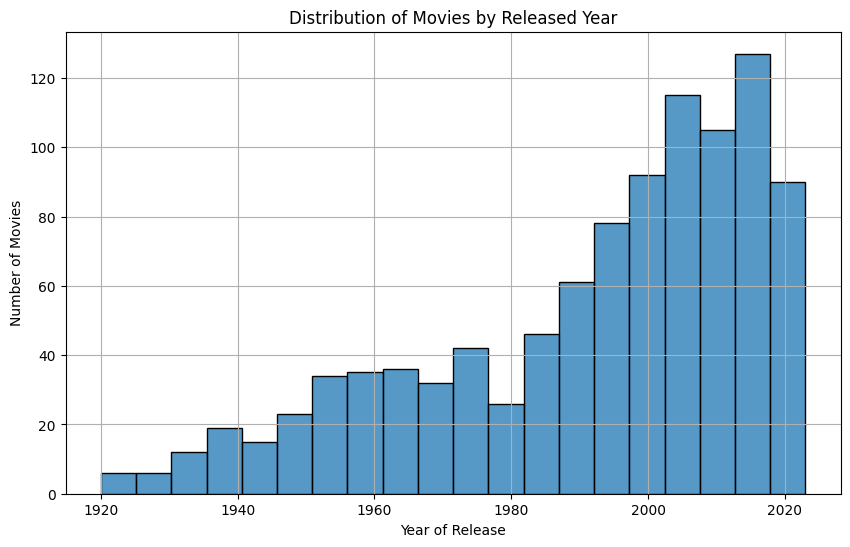

In [268]:
# Distribution of Movies by Released_Year
plt.figure(figsize=(10, 6))
sns.histplot(movies['Released_Year'], bins=20, kde=False)
plt.title('Distribution of Movies by Released Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- There is a noticeable increase in the number of movies released starting from the 1960s. Before the 1960s, the number of films released each year was relatively low, but there has been a consistent rise since then.

- The highest number of films was released between the 2000s and 2020s, indicating a significant expansion in the film industry during these decades.

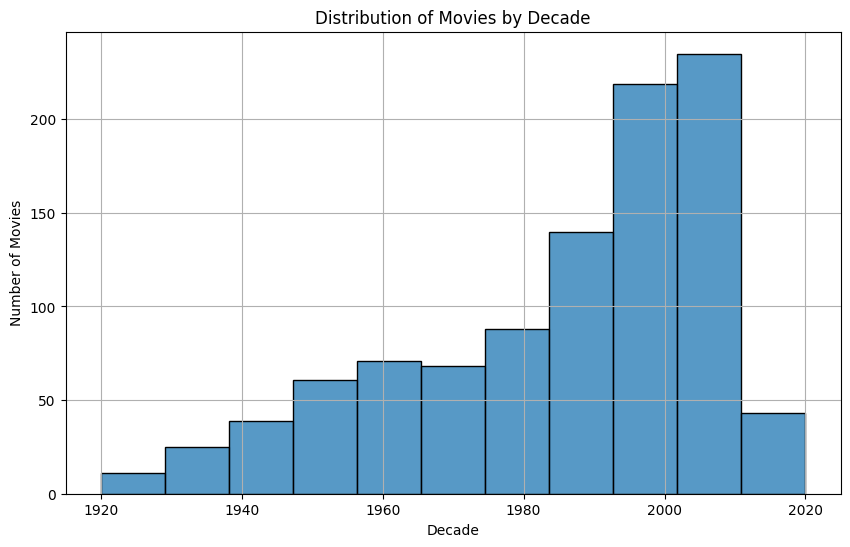

In [269]:
# Distribution of Movies by Decade
plt.figure(figsize=(10, 6))
sns.histplot(movies['Decade'], bins=len(movies['Decade'].unique()), kde=False)
plt.title('Distribution of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The graph illustrates a significant increase in film production from the 1980s to the 2010s, followed by a decline in the 2020s, possibly due to external factors.

- This could be due to the dataset being incomplete for this decade or external factors such as the COVID-19 pandemic, which may have affected film production.

- The peak in movie releases during the 2000s and 2010s highlights the industry's expansion and technological advancements in those decades.

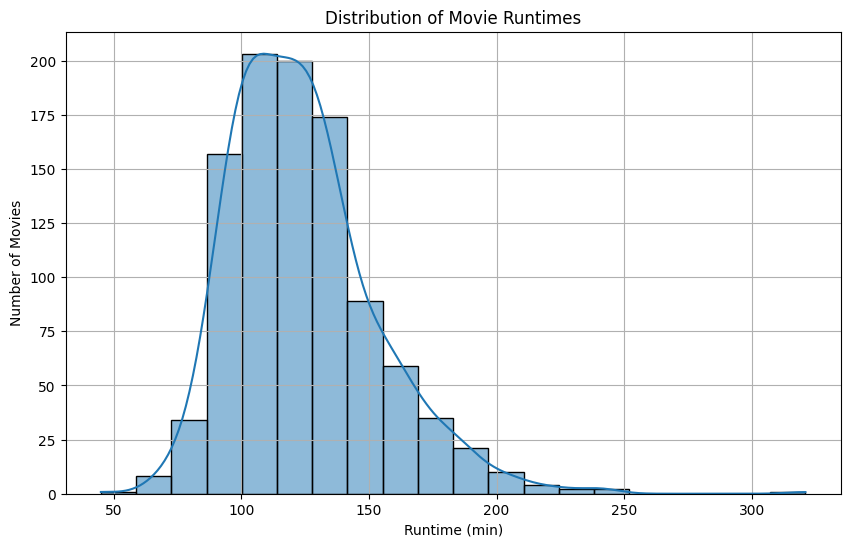

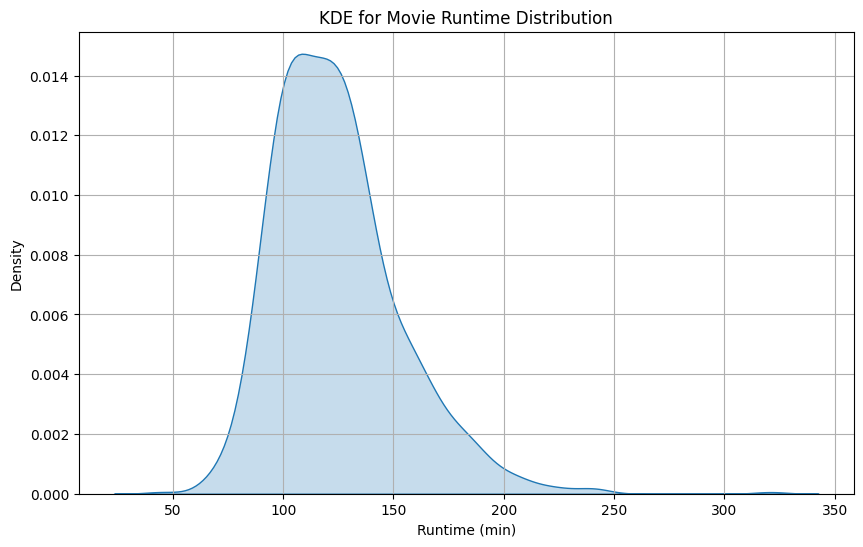

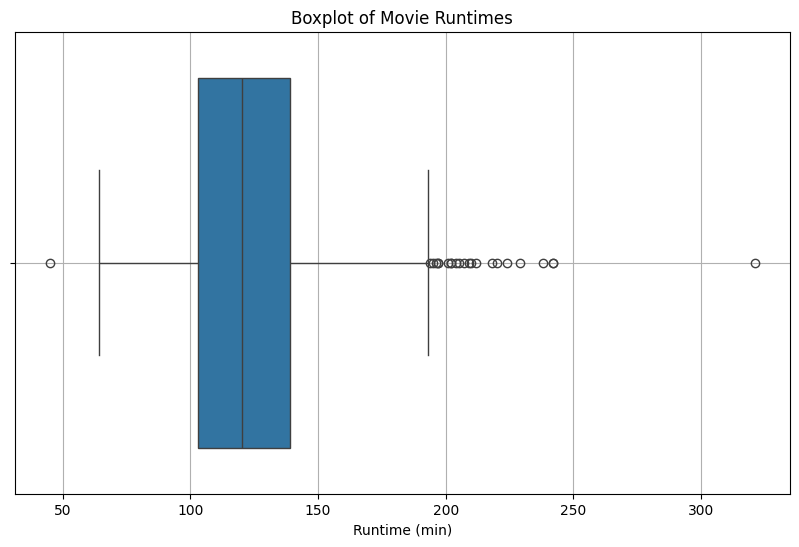

In [270]:
# Distribution of Runtime
# Histogram to show the distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(movies['Runtime'], bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# KDE for a smooth estimate of the distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.kdeplot(movies['Runtime'], shade=True)
plt.title('KDE for Movie Runtime Distribution')
plt.xlabel('Runtime (min)')
plt.grid(True)
plt.show()

# Boxplot to identify outliers in movie runtimes
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['Runtime'])
plt.title('Boxplot of Movie Runtimes')
plt.xlabel('Runtime (min)')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- Most movies have a runtime between 90 and 120 minutes, which is typical for standard film production.

- The boxplot shows a few movies with longer runtimes (outliers), which may include epic films, director’s cuts, or special editions that are much longer than average.

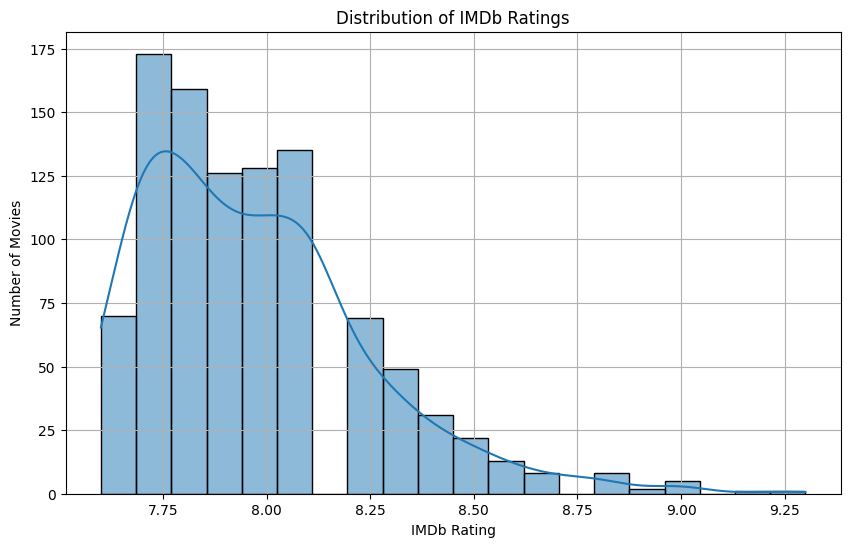

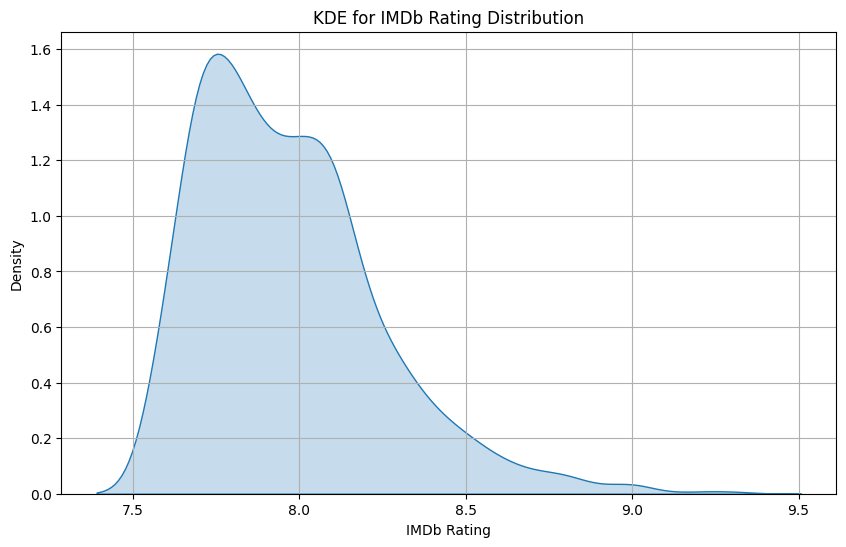

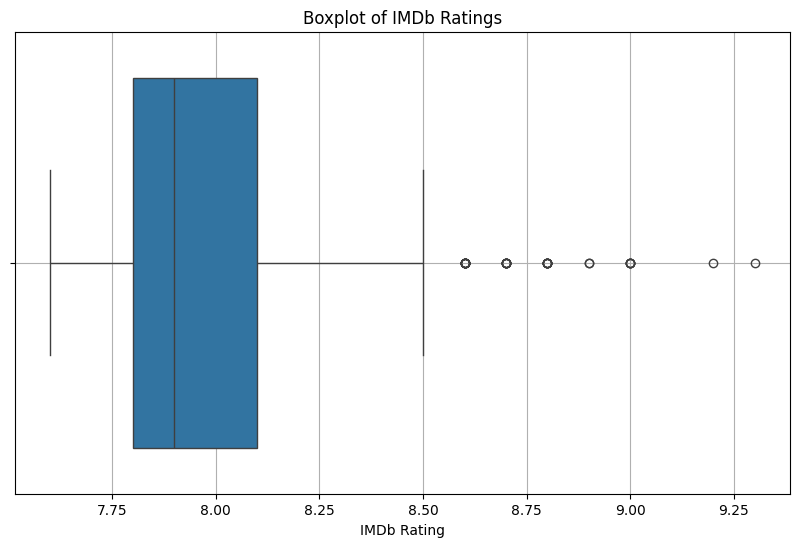

In [271]:
# Distribution of IMDB_Rating
# Histogram to show the distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# KDE for the distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(movies['IMDB_Rating'], shade=True)
plt.title('KDE for IMDb Rating Distribution')
plt.xlabel('IMDb Rating')
plt.grid(True)
plt.show()

# Boxplot for IMDb ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['IMDB_Rating'])
plt.title('Boxplot of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The distribution of IMDB ratings shows that most movies have a rating between 7 and 8.5, 
indicating that the movies in the dataset are generally well-rated.

- The boxplot reveals a few outliers with very high ratings.

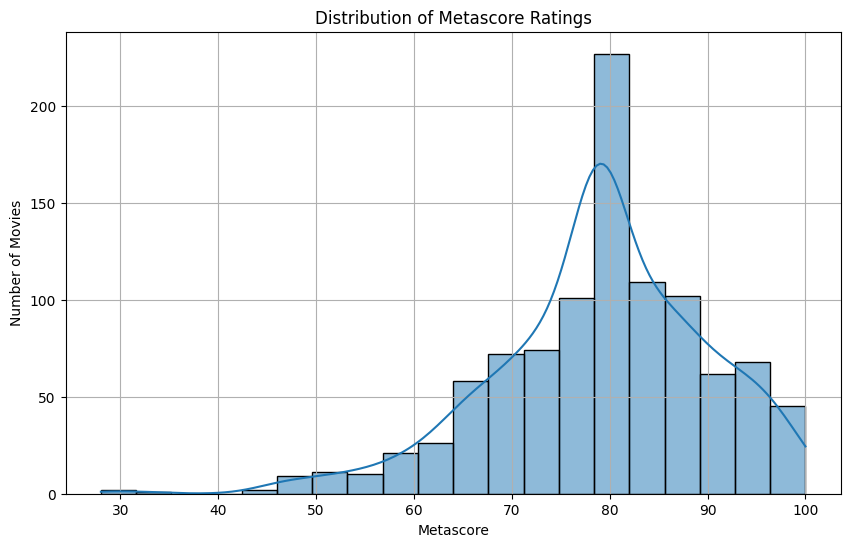

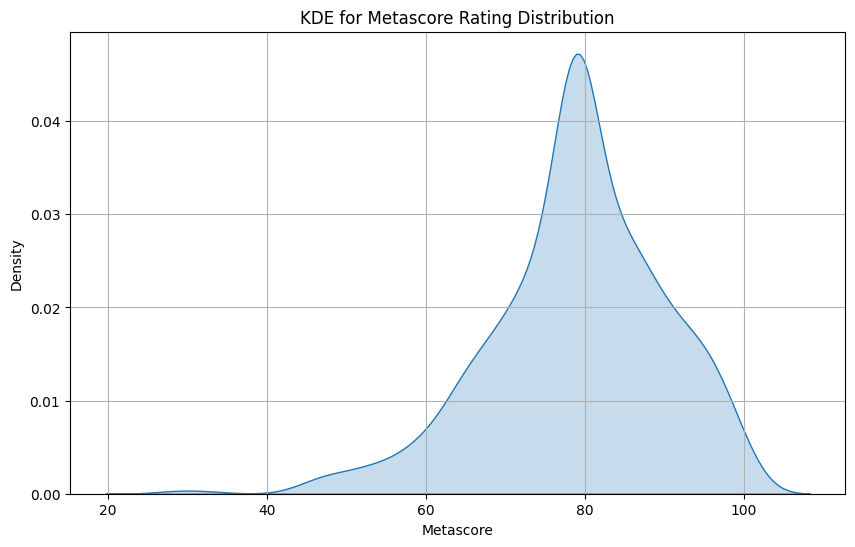

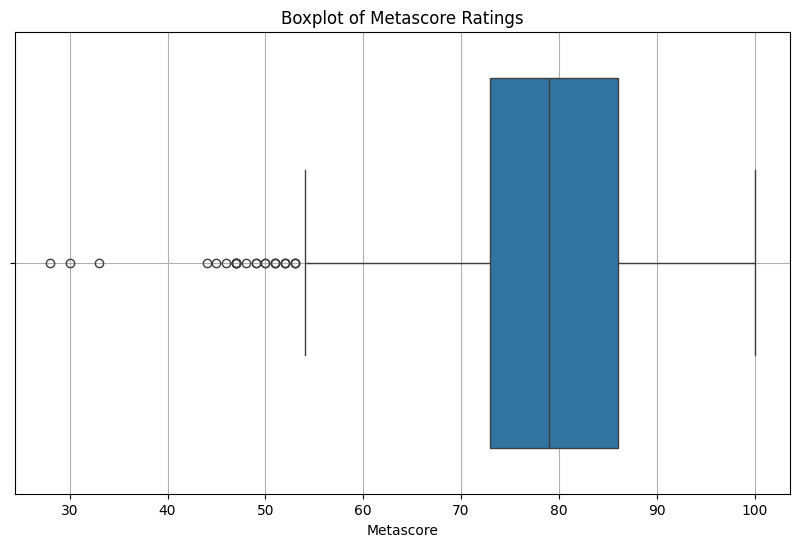

In [272]:
# Distribution of Metascore
# Histogram for Metascore
plt.figure(figsize=(10, 6))
sns.histplot(movies['Metascore'], bins=20, kde=True)
plt.title('Distribution of Metascore Ratings')
plt.xlabel('Metascore')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# KDE for Metascore
plt.figure(figsize=(10, 6))
sns.kdeplot(movies['Metascore'], shade=True)
plt.title('KDE for Metascore Rating Distribution')
plt.xlabel('Metascore')
plt.grid(True)
plt.show()

# Boxplot for Metascore
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['Metascore'])
plt.title('Boxplot of Metascore Ratings')
plt.xlabel('Metascore')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5> 

- Metascore ratings have a wider distribution compared to IMDB ratings,indicating a diverse range of critic opinions towards the movies.

- The distribution of Metascore shows that most movies have a rating between 70 and 90, 
indicating that the movies in the dataset are generally well-rated.

- The boxplot reveals a few outliers with very low Metascore ratings.

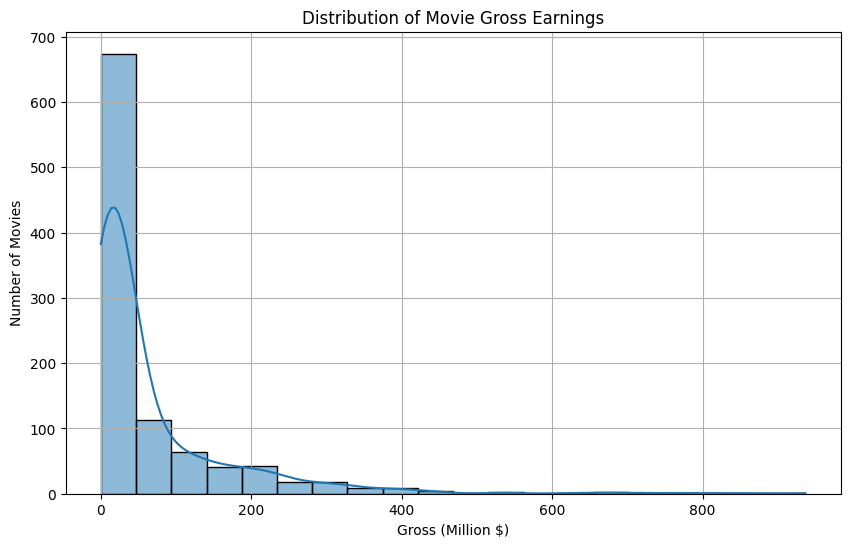

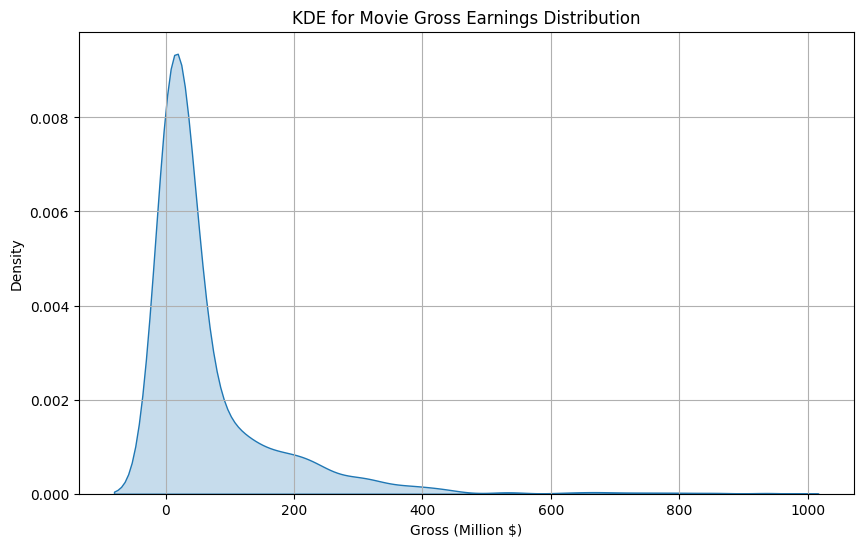

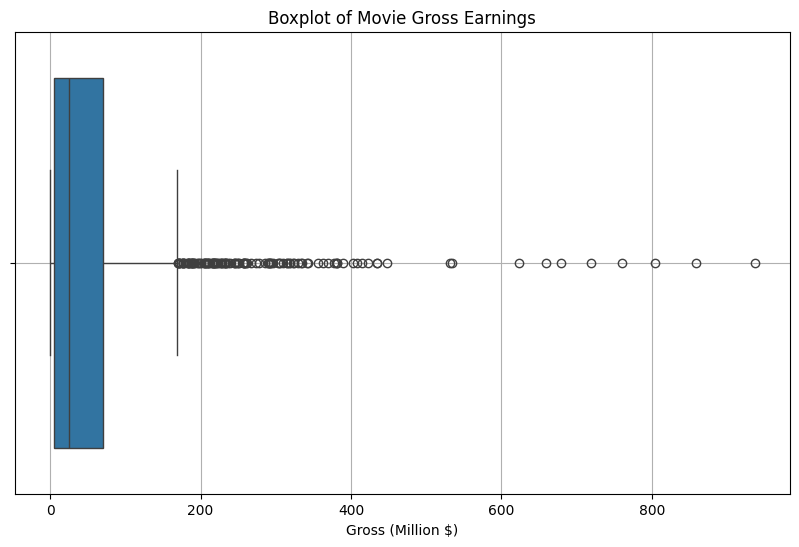

In [273]:
# Distribution of Gross
# Histogram to show the distribution of movie gross earnings
plt.figure(figsize=(10, 6))
sns.histplot(movies['Gross'], bins=20, kde=True)
plt.title('Distribution of Movie Gross Earnings')
plt.xlabel('Gross (Million $)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# KDE for the distribution of gross earnings
plt.figure(figsize=(10, 6))
sns.kdeplot(movies['Gross'], shade=True)
plt.title('KDE for Movie Gross Earnings Distribution')
plt.xlabel('Gross (Million $)')
plt.grid(True)
plt.show()

# Boxplot for gross earnings
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['Gross'])
plt.title('Boxplot of Movie Gross Earnings')
plt.xlabel('Gross (Million $)')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5> 

- Movie gross earnings show significant skewness, where most movies have relatively low earnings, while a few movies have exceptionally high earnings (shown as outliers in the boxplot).

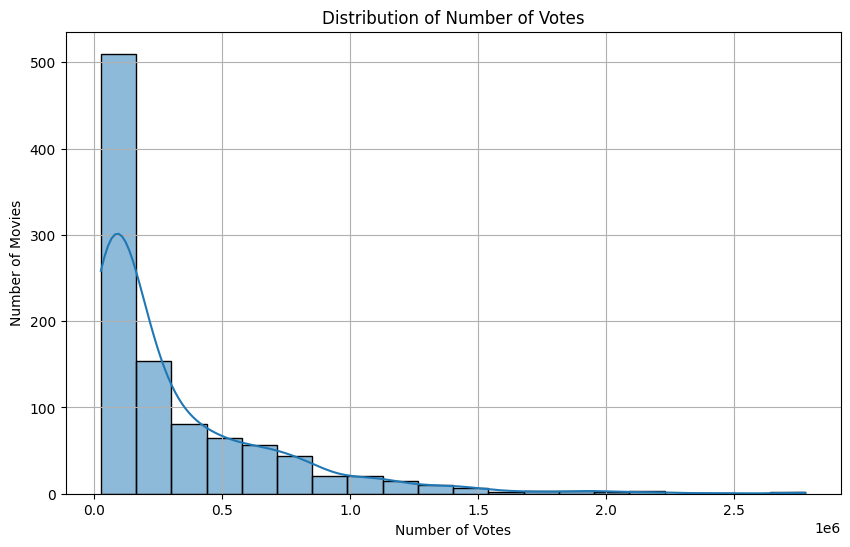

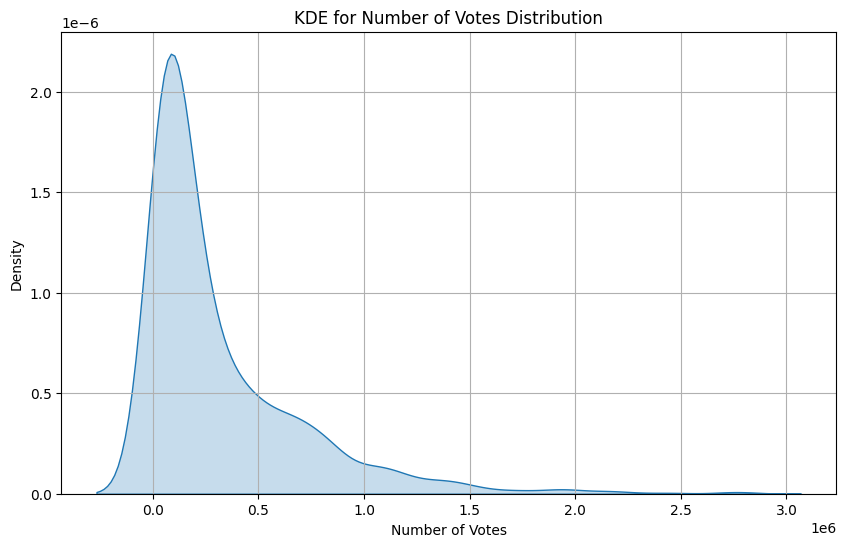

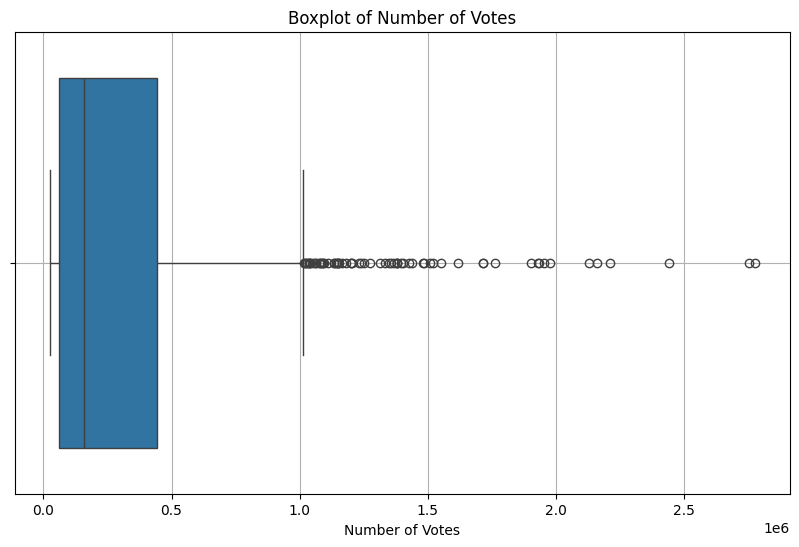

In [274]:
# Distribution of No_of_Votes
# Histogram to show the distribution of the number of votes
plt.figure(figsize=(10, 6))
sns.histplot(movies['No_of_Votes'], bins=20, kde=True)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# KDE for the number of votes
plt.figure(figsize=(10, 6))
sns.kdeplot(movies['No_of_Votes'], shade=True)
plt.title('KDE for Number of Votes Distribution')
plt.xlabel('Number of Votes')
plt.grid(True)
plt.show()

# Boxplot for the number of votes
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies['No_of_Votes'])
plt.title('Boxplot of Number of Votes')
plt.xlabel('Number of Votes')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5> 

- The number of votes shows a high concentration at the lower end of the spectrum, indicating that most movies have a relatively small number of votes, while a few movies have exceptionally high vote counts.

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Groupby comparisons
- Bar Charts

In [275]:
# Create a new column 'Color' that categorizes movies as 'Black & White' or 'Color'
# This assumes that movies released before 1960 are 'Black & White', while those released in 1960 or later are 'Color'
movies['Color'] = movies['Released_Year'].apply(lambda x: 'Black & White' if x < 1960 else 'Color')

# Group the movies by 'Decade' and 'Color', then count the number of movies in each category
# The result is reshaped into a DataFrame where each column represents a color category ('Black & White' or 'Color')
# Missing values are filled with 0 to indicate that no movies fall into a particular category for that decade
color_distribution = movies.groupby(['Decade', 'Color']).size().unstack().fillna(0)

In [276]:
#Categorization of IMDB Ratings
def rating(IMDB_Rating):
    if IMDB_Rating >= 9.0:
        return 'Exceptional'
    elif IMDB_Rating >= 8.5:
        return 'Excellent'
    elif IMDB_Rating >= 8.0:
        return 'Very Good'
    elif IMDB_Rating >= 7.0:
        return 'Good'
    elif IMDB_Rating >= 6.0:
        return 'Average'
    else:
        return 'Below Average'

movies['Rating_Category'] = movies['IMDB_Rating'].apply(rating)

movies.head(15)


,Title,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Decade,Color,Rating_Category
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,2777378,1990,Color,Exceptional
1,The Godfather,1972,175,9.2,100.0,134.97,1933588,1970,Color,Exceptional
2,The Dark Knight,2008,152,9.0,84.0,534.86,2754087,2000,Color,Exceptional
3,Schindler's List,1993,195,9.0,95.0,96.90,1397886,1990,Color,Exceptional
4,12 Angry Men,1957,96,9.0,97.0,4.36,824211,1950,Black & White,Exceptional
5,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,377.85,1904166,2000,Color,Exceptional
6,The Godfather Part II,1974,202,9.0,90.0,57.30,1314609,1970,Color,Exceptional
7,Spider-Man: Across the Spider-Verse,2023,140,8.9,86.0,15.00,198031,2020,Color,Excellent
8,Pulp Fiction,1994,154,8.9,95.0,107.93,2131189,1990,Color,Excellent
9,Inception,2010,148,8.8,74.0,292.58,2444816,2010,Color,Excellent


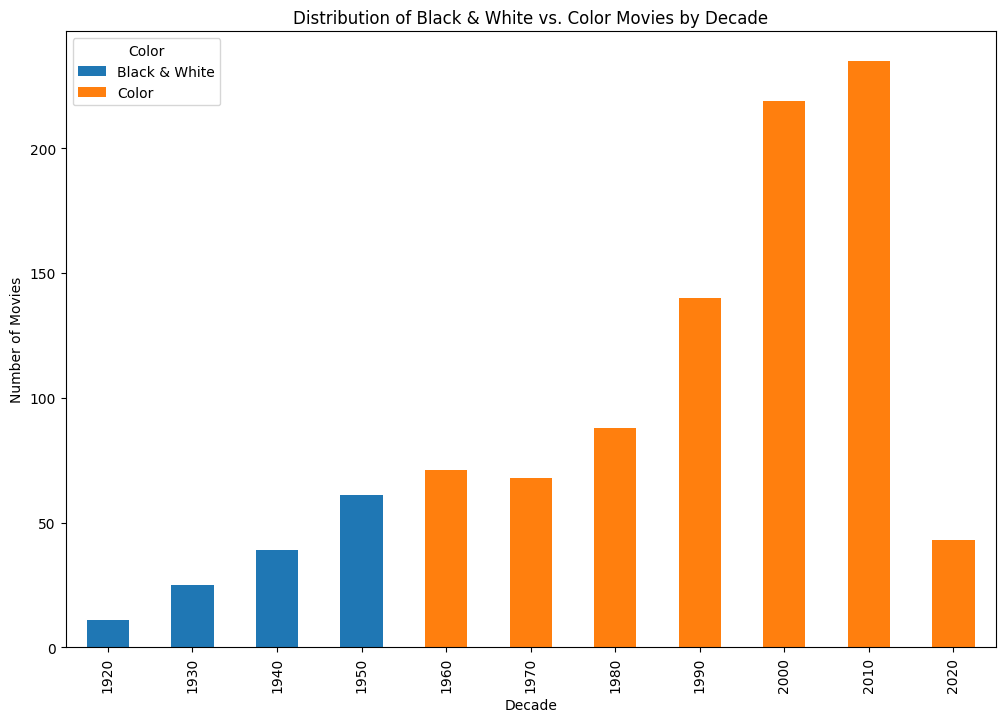

In [277]:
# Visualize the distribution of Black & White vs. Color movies by decade
color_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Black & White vs. Color Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()

<h5 style="color: salmon;">Conclusion</h5> 

- The bar chart illustrates the historical transition from black-and-white to color films across different decades. 

- Starting in the mid-20th century, there is a clear and significant increase in the production of color films, which eventually became the dominant format.

- This shift reflects the technological advancements in filmmaking and the growing preference for color films in the industry.

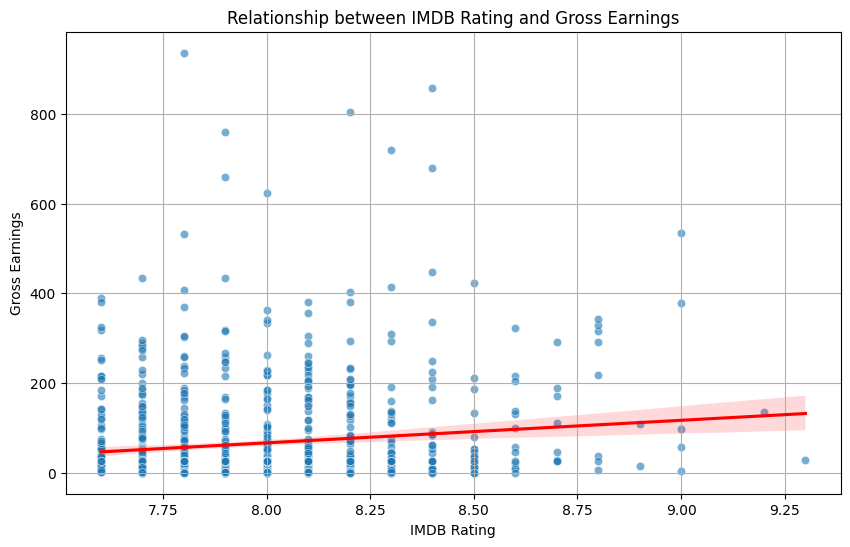

In [278]:
# Scatterplot between IMDB Rating and Gross Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=movies, alpha=0.6)
sns.regplot(x='IMDB_Rating', y='Gross', data=movies, scatter=False, color='r')
plt.title("Relationship between IMDB Rating and Gross Earnings")
plt.xlabel("IMDB Rating")
plt.ylabel("Gross Earnings")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line indicates a positive relationship between IMDB rating and gross earnings.

- However, the data shows significant variability around this regression line, suggesting that while there is a general trend for films with higher IMDB ratings to have higher earnings, the correlation is not particularly strong.

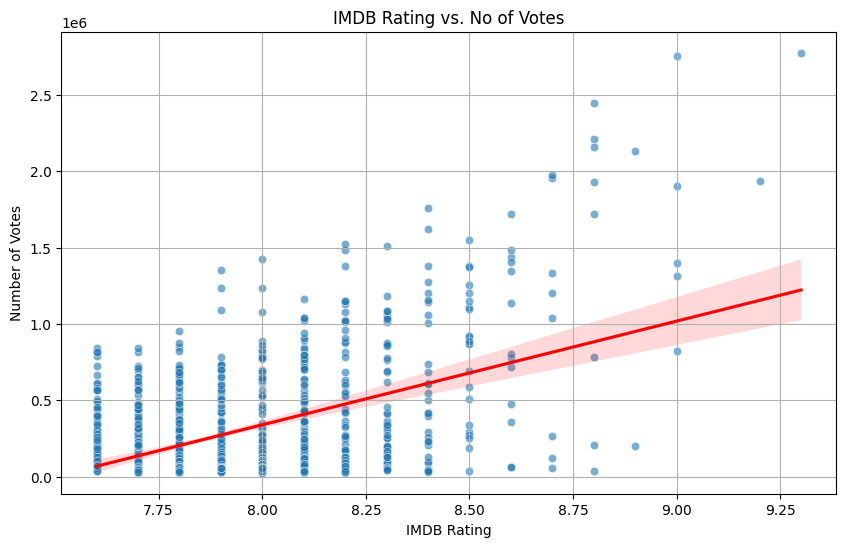

In [279]:
#Scatter Plot of IMDb Ratings vs. Number of Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='No_of_Votes', data=movies, alpha=0.6)
sns.regplot(x='IMDB_Rating', y='No_of_Votes', data=movies, scatter=False, color='r')
plt.title('IMDB Rating vs. No of Votes')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line demonstrates a positive relationship between IMDB rating and the number of votes. The regression line shows a clear upward trend, suggesting that films with higher IMDB ratings tend to receive more votes.

- However, despite this positive trend, there is noticeable variability in the data, with several points deviating significantly from the regression line.

- This indicates that while better IMDB ratings are generally associated with more votes, the relationship is not perfectly linear and other factors may influence the number of votes.

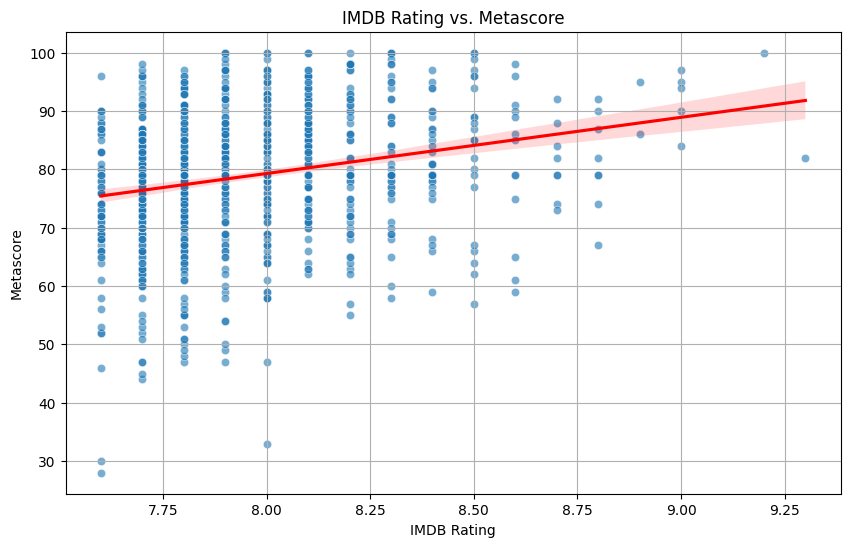

In [280]:
# Scatterplot of IMDB Rating vs. Metascore
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Metascore', data=movies, alpha=0.6)
sns.regplot(x='IMDB_Rating', y='Metascore', data=movies, scatter=False, color='r')
plt.title("IMDB Rating vs. Metascore")
plt.xlabel("IMDB Rating")
plt.ylabel("Metascore")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line illustrates a positive relationship between IMDB rating and Metascore. The upward-sloping regression line indicates that higher IMDB ratings are generally associated with higher Metascore values.

- However, there is considerable scatter around the regression line, suggesting that while there is a positive trend, the correlation between IMDB rating and Metascore is not strong and consistent. This scatter indicates variability in how IMDB ratings and Metascore are related.

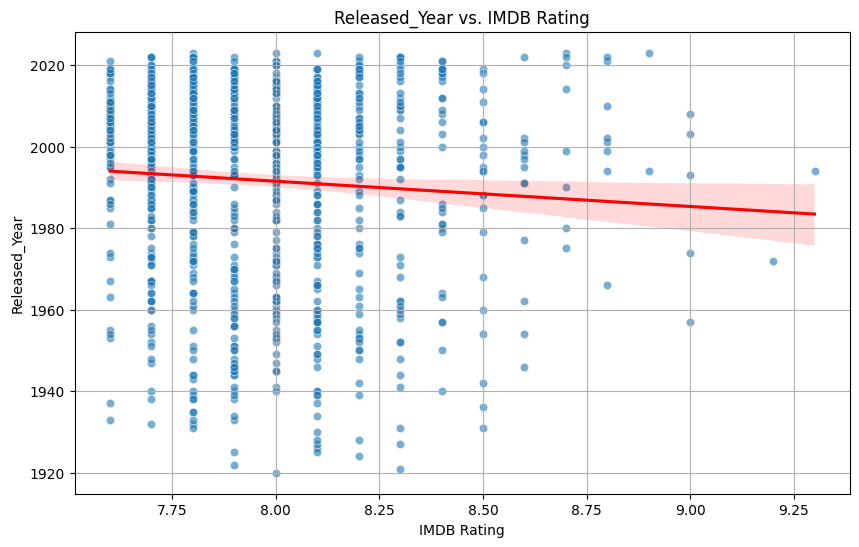

In [281]:
# Scatterplot of Released_Year vs. IMDB Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Released_Year', x='IMDB_Rating', data=movies, alpha=0.6)
sns.regplot(y='Released_Year', x='IMDB_Rating', data=movies, scatter=False, color='r')
plt.title("Released_Year vs. IMDB Rating")
plt.ylabel("Released_Year")
plt.xlabel("IMDB Rating")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line shows a negative relationship between IMDB rating and the year of release. The downward-sloping regression line suggests that, on average, more recent films tend to have lower IMDB ratings.

- Despite this observed trend, there is considerable scatter around the regression line, indicating that the relationship between IMDB rating and the year of release is not very strong. Many data points deviate significantly from the regression line.

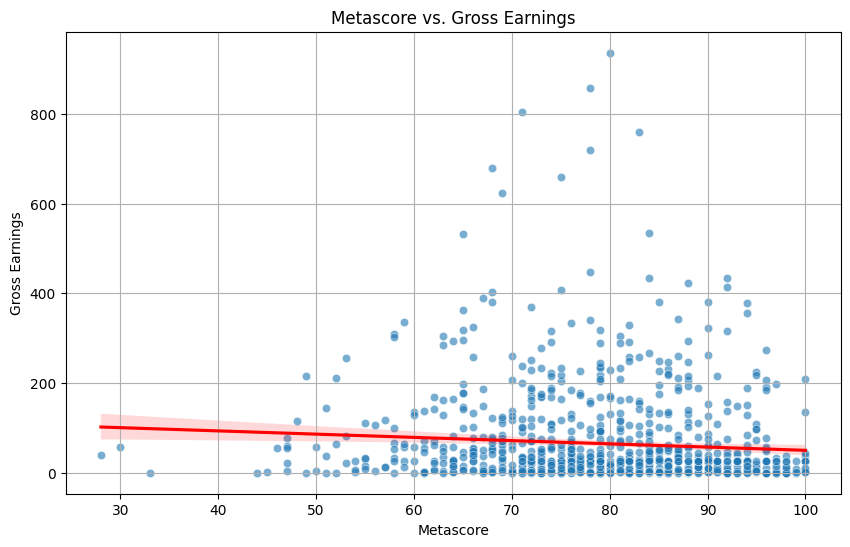

In [282]:
# Scatterplot of Metascore vs. Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metascore', y='Gross', data=movies, alpha=0.6)
sns.regplot(x='Metascore', y='Gross', data=movies, scatter=False, color='r')
plt.title("Metascore vs. Gross Earnings")
plt.xlabel("Metascore")
plt.ylabel("Gross Earnings")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line demonstrates a negative relationship between Metascore and gross earnings. The downward-sloping regression line indicates that, generally, films with higher Metascore values tend to have lower gross earnings.

- However, there are notable exceptions where some films with a Metascore around 80 have achieved exceptionally high gross earnings. This suggests that while a higher Metascore is associated with lower earnings on average, there are films that manage to perform exceptionally well financially despite having high scores.

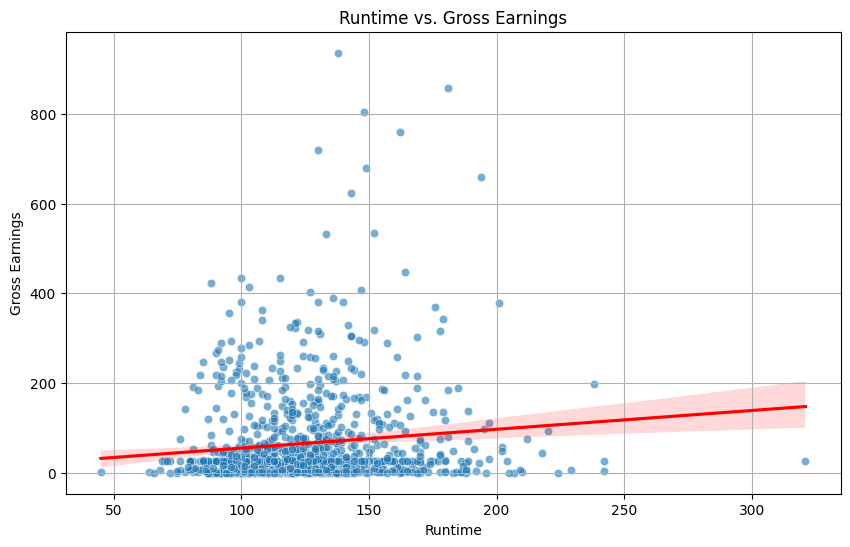

In [283]:
# Scatterplot of Runtime vs. Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Gross', data=movies, alpha=0.6)
sns.regplot(x='Runtime', y='Gross', data=movies, scatter=False, color='r')
plt.title("Runtime vs. Gross Earnings")
plt.xlabel("Runtime")
plt.ylabel("Gross Earnings")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line indicates a positive relationship between runtime and gross earnings. The upward-sloping regression line suggests that, on average, films with longer runtimes tend to have higher gross earnings.

- The data shows a significant concentration of films with runtimes between 100 and 150 minutes, with many of these films falling within this range. However, the highest gross earnings are observed for films with runtimes between 130 and 180 minutes. This indicates that while longer runtimes generally correlate with higher earnings, films with very long runtimes (130-180 minutes) tend to achieve the highest earnings.

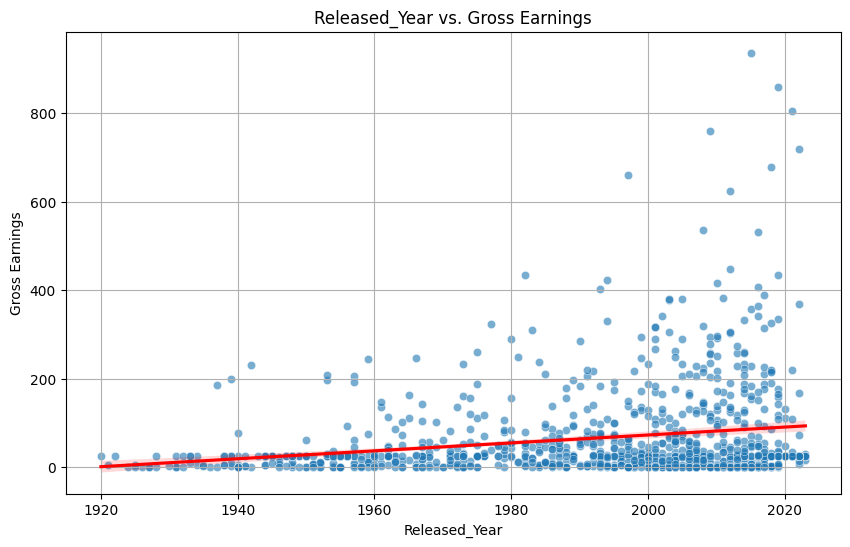

In [284]:
# Scatterplot of Released_Year vs. Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Released_Year', y='Gross', data=movies, alpha=0.6)
sns.regplot(x='Released_Year', y='Gross', data=movies, scatter=False, color='r')
plt.title("Released_Year vs. Gross Earnings")
plt.xlabel("Released_Year")
plt.ylabel("Gross Earnings")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line shows a generally positive relationship between the release year of films and their gross earnings. The upward-sloping regression line suggests that, on average, films released in more recent years tend to have higher gross earnings.

- Most data points are clustered around this regression line, indicating a consistent trend. However, there are notable exceptions: a few films released between 2000 and 2020 have achieved exceptionally high earnings compared to the overall trend.

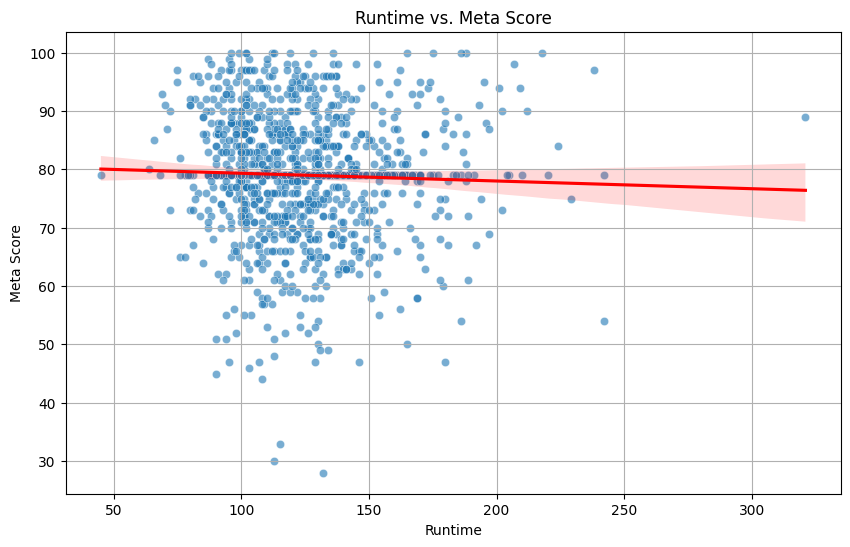

In [285]:
# Scatter Plot of Movie Runtime vs. Metascore
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Metascore', data=movies, alpha=0.6)
sns.regplot(x='Runtime', y='Metascore', data=movies, scatter=False, color='r')
plt.title('Runtime vs. Meta Score')
plt.xlabel('Runtime')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- The scatterplot with a red regression line illustrates a negative relationship between movie runtime and Metascore. The downward-sloping regression line indicates that, on average, longer movies tend to have lower Metascores.

- Most data points are concentrated between runtimes of 100 and 150 minutes, with a significant number of points both above and below the regression line. This suggests that while there is a general trend of decreasing Metascore with increasing runtime, there is considerable variability in the data.

In [286]:
# Calculate the correlation matrix for selected columns in the `movies` DataFrame.
movies_corr = movies[['Released_Year','Runtime','IMDB_Rating','Metascore', 'Gross', 'No_of_Votes', 'Decade']].dropna().corr()
movies_corr

,Released_Year,Runtime,IMDB_Rating,Metascore,Gross,No_of_Votes,Decade
Released_Year,1.000000,0.208913,-0.070580,-0.321408,0.203028,0.238391,0.993095
Runtime,0.208913,1.000000,0.272353,-0.034591,0.113236,0.154984,0.211527
IMDB_Rating,-0.070580,0.272353,1.000000,0.241215,0.130000,0.483813,-0.070027
Metascore,-0.321408,-0.034591,0.241215,1.000000,-0.074492,-0.063338,-0.323678
Gross,0.203028,0.113236,0.130000,-0.074492,1.000000,0.572090,0.200274
No_of_Votes,0.238391,0.154984,0.483813,-0.063338,0.572090,1.000000,0.237038
Decade,0.993095,0.211527,-0.070027,-0.323678,0.200274,0.237038,1.000000


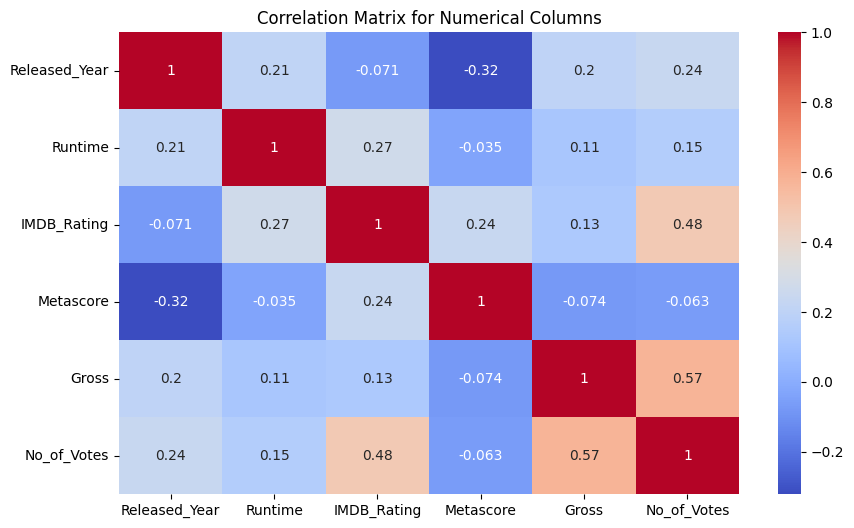

In [287]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 6))
corr = movies[['Released_Year', 'Runtime', 'IMDB_Rating', 'Metascore', 'Gross', 'No_of_Votes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

<h5 style="color: salmon;">Conclusion</h5>


- IMDB Rating and No of Votes: There is a moderate positive correlation (0.484), suggesting that films with higher IMDB ratings tend to receive more votes.

- Gross and No of Votes: A strong positive correlation (0.572) shows that films with higher gross earnings generally receive more votes.

- Metascore and IMDB Rating: A moderate positive correlation (0.241) indicates that films with higher Metascores tend to have higher IMDB ratings, but the relationship is not very strong.

- Runtime and IMDB Rating: A moderate positive correlation (0.272) suggests that longer films tend to have slightly higher IMDB ratings.

- Metascore and Gross: A slight negative correlation (-0.074) indicates that there is little to no direct relationship between Metascore and gross earnings.

- Other Variables: Most other correlations are relatively weak, suggesting less direct linear relationships between those variables.

- Overall, the matrix reveals some significant relationships, particularly between gross earnings and number of votes, as well as moderate connections between IMDB ratings and votes. Other correlations are weaker, indicating that while some patterns exist, many variables do not have strong linear relationships with each other.

Average Gross by Rating Category:
Rating_Category
Excellent       99.373396
Exceptional    176.368571
Good            58.625038
Very Good       67.128034
Name: Gross, dtype: float64


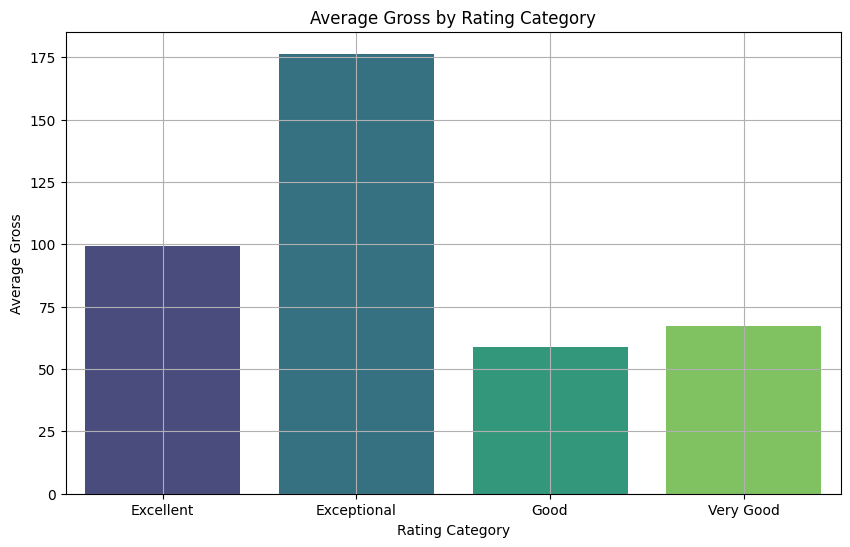

In [288]:
# Groupby Comparisons: Average Gross by Rating Category
average_gross_by_category = movies.groupby('Rating_Category')['Gross'].mean()
print("Average Gross by Rating Category:")
print(average_gross_by_category)

# Barplot to display average gross by rating category
plt.figure(figsize=(10, 6))
sns.barplot(x=average_gross_by_category.index, y=average_gross_by_category.values, palette='viridis')
plt.title("Average Gross by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Average Gross")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- Overall, films with higher rating categories tend to have higher average gross earnings, suggesting that critical acclaim correlates positively with financial success.

Average Gross by Color Column:
Color
Black & White    26.953235
Color            71.118634
Name: Gross, dtype: float64


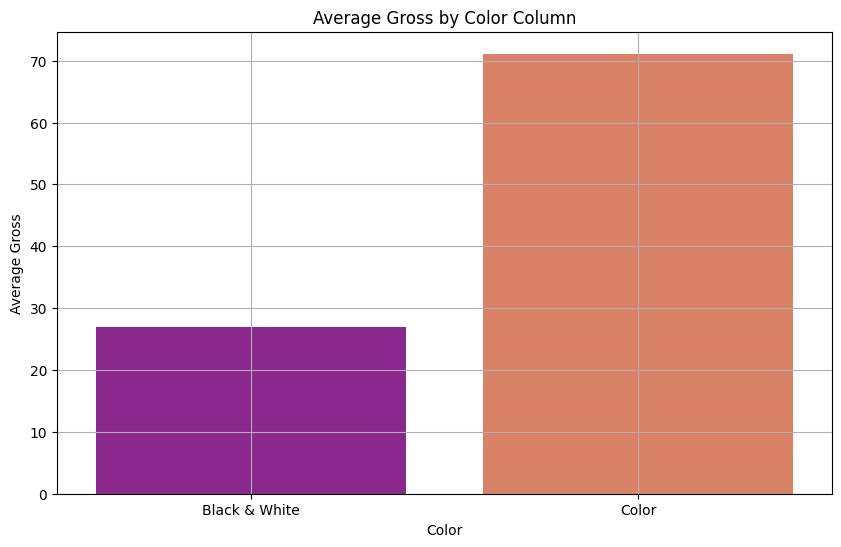

In [289]:
# Average Gross by Color Column (Groupby)
average_gross_by_color = movies.groupby('Color')['Gross'].mean()
print("Average Gross by Color Column:")
print(average_gross_by_color)

# Barplot to display average gross by color column
plt.figure(figsize=(10, 6))
sns.barplot(x=average_gross_by_color.index, y=average_gross_by_color.values, palette='plasma')
plt.title("Average Gross by Color Column")
plt.xlabel("Color")
plt.ylabel("Average Gross")
plt.grid(True)
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- Overall, films in color tend to achieve higher average gross earnings than black and white films, suggesting that color films may be more commercially successful.

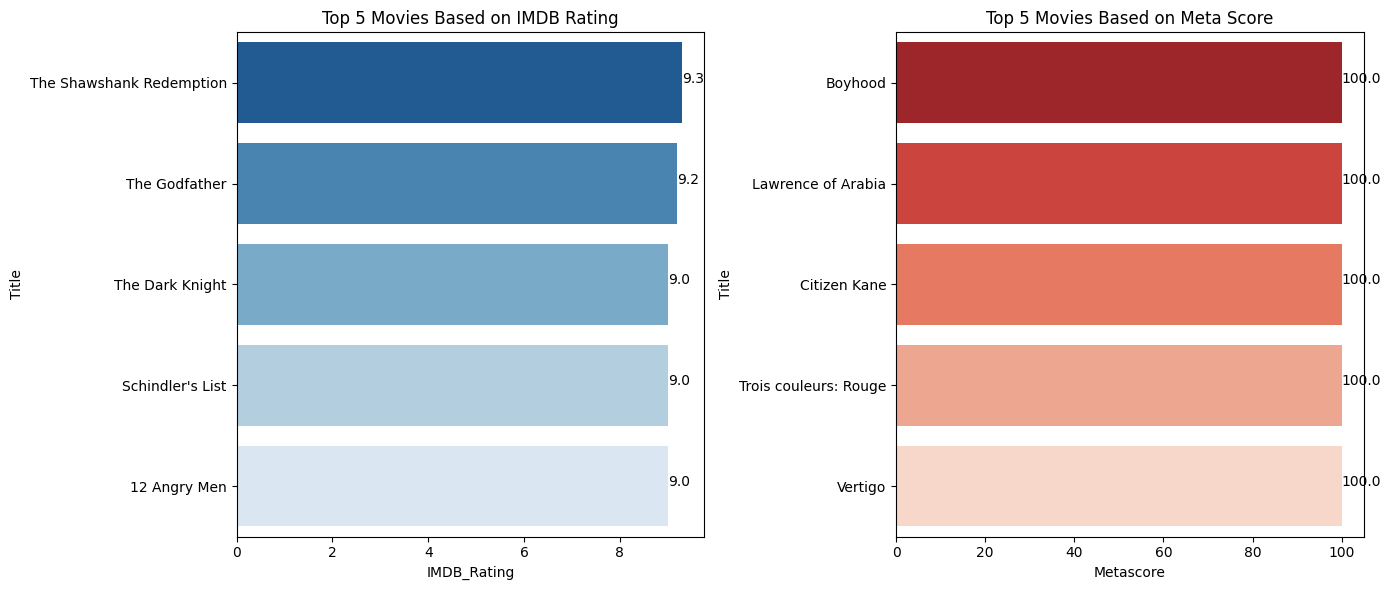

In [290]:
# Bar Charts for Top-Rated Movies
top_movies_imdb = movies.sort_values(by='IMDB_Rating', ascending=False).head(5)

top_movies_meta = movies.sort_values(by='Metascore', ascending=False).head(5)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='IMDB_Rating', y='Title', data=top_movies_imdb, palette='Blues_r')
plt.title('Top 5 Movies Based on IMDB Rating')
for index, value in enumerate(top_movies_imdb['IMDB_Rating']):
    plt.text(value, index, f'{value:.1f}')

plt.subplot(1, 2, 2)
sns.barplot(x='Metascore', y='Title', data=top_movies_meta, palette='Reds_r')
plt.title('Top 5 Movies Based on Meta Score')
for index, value in enumerate(top_movies_meta['Metascore']):
    plt.text(value, index, f'{value:.1f}')

plt.tight_layout()
plt.show()

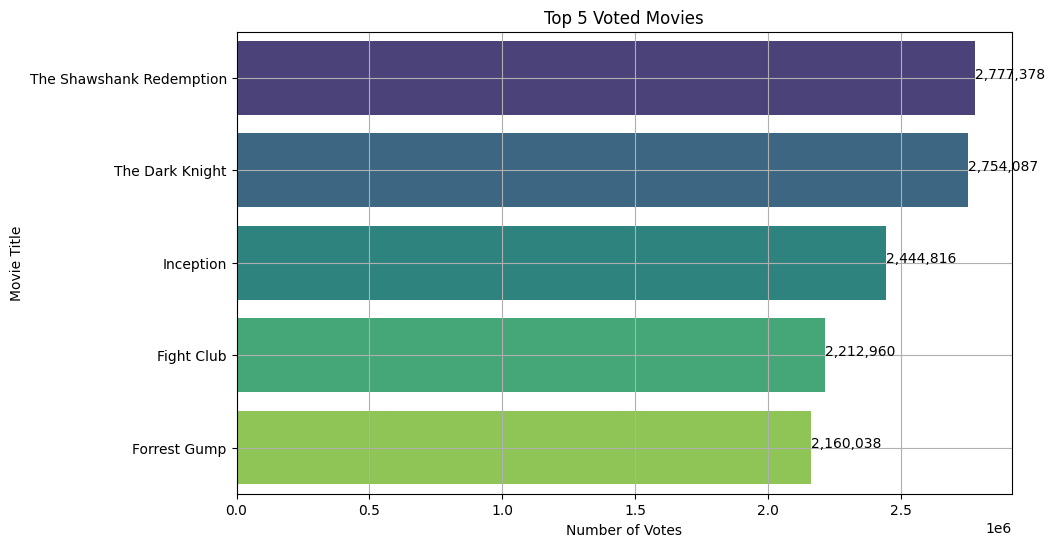

In [291]:
# Analysis of Top Voted Movies
top_voted_movies = movies.sort_values(by='No_of_Votes', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='No_of_Votes', y='Title', data=top_voted_movies, palette='viridis')
plt.title('Top 5 Voted Movies')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.grid(True)
for index, value in enumerate(top_voted_movies['No_of_Votes']):
    plt.text(value, index, f'{value:,}')
plt.show()

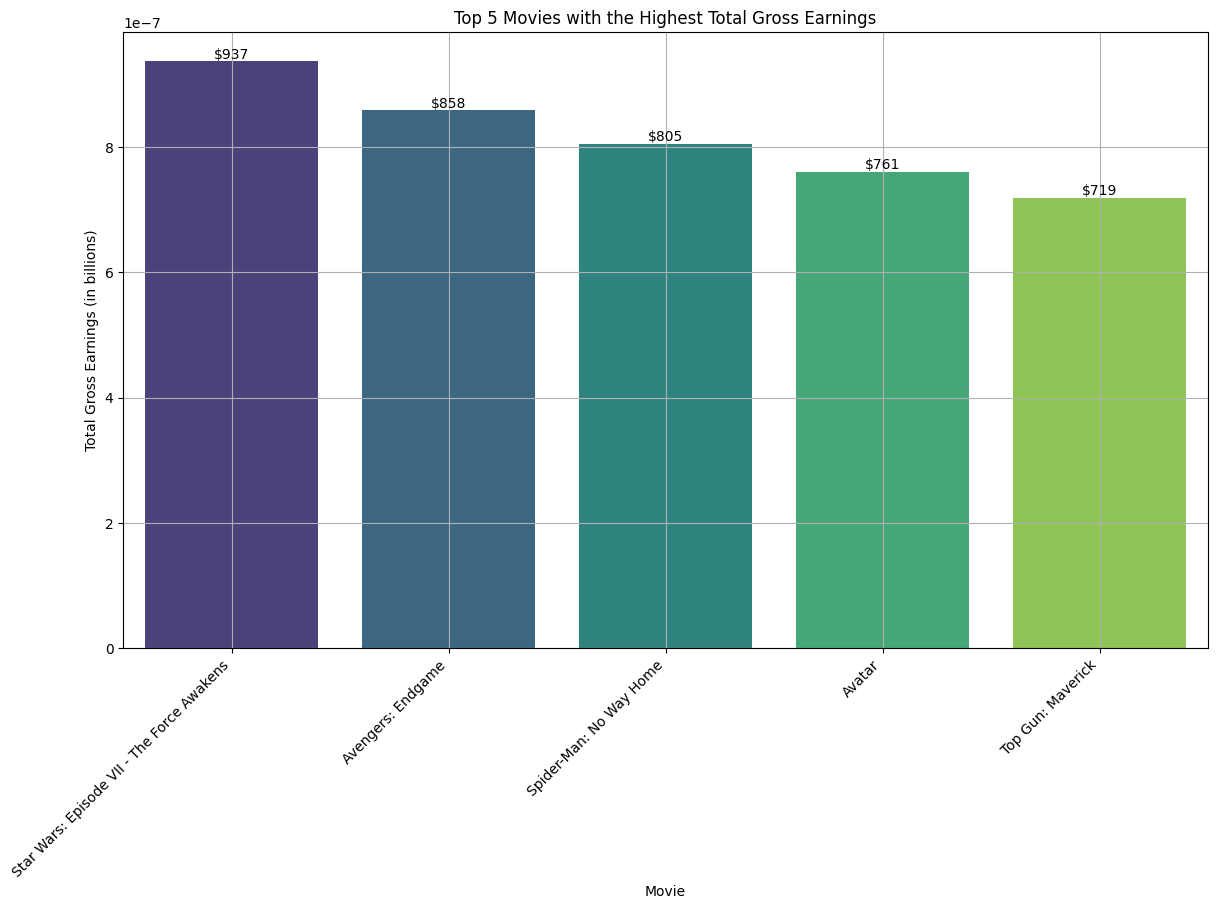

In [292]:
# Gross Earnings Analysis
top_movies_gross = movies.groupby('Title')['Gross'].sum().nlargest(5)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_movies_gross.index, y=top_movies_gross.values / 1e9, order=top_movies_gross.index, palette='viridis')
plt.title('Top 5 Movies with the Highest Total Gross Earnings')
plt.xlabel('Movie')
plt.ylabel('Total Gross Earnings (in billions)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Annotate the bars with the total gross earnings
for index, value in enumerate(top_movies_gross.values):
    plt.text(index, value / 1e9, f'${value:,.0f}', ha='center', va='bottom')

plt.show()

# Step 5: Questions

- <p style='color:aqua'>Q1: What are the top-rated movies with fewer than 100,000 votes on IMDB?</p>

In [293]:
# Filter movies with less than 100,000 votes and sort them by IMDB rating in descending order
hidden_gems_imdb = movies[movies["No_of_Votes"] < 100000].sort_values("IMDB_Rating", ascending=False).head(10)

# Print the top 10 hidden gems based on IMDB rating
print("Top Hidden Gems by IMDB Rating:")
# Display the title, IMDB rating, and number of votes for the top 10 movies
hidden_gems_imdb[["Title", "IMDB_Rating", "No_of_Votes"]]

Top Hidden Gems by IMDB Rating:


,Title,IMDB_Rating,No_of_Votes
16,777 Charlie,8.8,35870
23,Rocketry: The Nambi Effect,8.7,54505
36,Seppuku,8.6,62597
37,Sita Ramam,8.6,61758
59,96,8.5,33646
73,Idi i smotri,8.4,88282
79,Capharnaüm,8.4,97339
86,Tengoku to jigoku,8.4,48880
87,Kaithi,8.4,36952
88,Sardar Udham,8.4,44711


- <p style='color:aqua'>Q2: What are the top-rated movies with fewer than 100,000 votes according to Metascore?</p>

In [294]:
# Filter movies with less than 100,000 votes and sort them by Metascore in descending order
hidden_gems_meta = movies[movies["No_of_Votes"] < 100000].sort_values("Metascore", ascending=False).head(10)

# Print the top 10 hidden gems based on Metascore
print("Top Hidden Gems by Metascore:")
# Display the title, Metascore, and number of votes for the top 10 movies
hidden_gems_meta[["Title", "Metascore", "No_of_Votes"]]

Top Hidden Gems by Metascore:


,Title,Metascore,No_of_Votes
555,Il conformista,100.0,32373
443,Sweet Smell of Success,100.0,34241
428,Il gattopardo,100.0,27615
288,Fanny och Alexander,100.0,65764
186,Tôkyô monogatari,100.0,64996
590,La règle du jeu,99.0,30374
535,The Wild Bunch,98.0,87997
199,La passion de Jeanne d'Arc,98.0,57981
914,The Lady Vanishes,98.0,55167
314,Du rififi chez les hommes,97.0,35854


- <p style='color:aqua'>Q3: What are the movies with a runtime of 180 minutes or more and an IMDB rating above 8? How many such movies are there?</p>

In [295]:
# Filter for movies with runtime greater than or equal to 180 minutes and IMDb rating greater than 8
long_high_rated_movies = movies[(movies['Runtime'] >= 180) & (movies['IMDB_Rating'] > 8)]

# Print the titles of movies that meet the criteria
print("Titles of movies with runtime >= 180 minutes and IMDb rating > 8:")
# Display the title, runtime, and IMDb rating for the filtered movies
long_high_rated_movies[['Title', 'Runtime', 'IMDB_Rating']]

Titles of movies with runtime >= 180 minutes and IMDb rating > 8:


,Title,Runtime,IMDB_Rating
3,Schindler's List,195,9.0
5,The Lord of the Rings: The Return of the King,201,9.0
6,The Godfather Part II,202,9.0
17,Oppenheimer,180,8.7
29,The Green Mile,189,8.6
34,Shichinin no samurai,207,8.6
66,Avengers: Endgame,181,8.4
106,Once Upon a Time in America,229,8.3
111,Lawrence of Arabia,218,8.3
140,The Wolf of Wall Street,180,8.2


In [296]:
# Calculate the total number of movies with runtime greater than or equal to 180 minutes and IMDb rating greater than 8
total_long_high_rated_movies = long_high_rated_movies.shape[0]

# Print the total number of movies that meet the criteria
print(f"Total number of movies with runtime >= 180 minutes and IMDb rating > 8: {total_long_high_rated_movies}")

Total number of movies with runtime >= 180 minutes and IMDb rating > 8: 23


- <p style='color:aqua'>Q4: What are the top 10 movies with the highest Gross, best IMDB rating, and highest Metascore?</p>

In [297]:
# Find the top 10 movies with the highest gross, best IMDb rating, and highest Metascore
top_10_gross_imdb_meta = movies[['Title', 'Gross', 'IMDB_Rating', 'Metascore']].sort_values(by=['Gross', 'IMDB_Rating', 'Metascore'], ascending=[False, False, False]).head(10)

# Print the top 10 movies with the highest gross, best IMDb rating, and highest Metascore
print("Top 10 movies with highest Gross, best IMDB Rating, and highest Metascore:")
top_10_gross_imdb_meta

Top 10 movies with highest Gross, best IMDB Rating, and highest Metascore:


,Title,Gross,IMDB_Rating,Metascore
635,Star Wars: Episode VII - The Force Awakens,936.66,7.8,80.0
66,Avengers: Endgame,858.37,8.4,78.0
142,Spider-Man: No Way Home,804.75,8.2,71.0
475,Avatar,760.51,7.9,83.0
91,Top Gun: Maverick,718.73,8.3,78.0
70,Avengers: Infinity War,678.82,8.4,68.0
473,Titanic,659.33,7.9,75.0
358,The Avengers,623.28,8.0,69.0
2,The Dark Knight,534.86,9.0,84.0
626,Rogue One,532.18,7.8,65.0


- <p style='color:aqua'>Q5: What are the top 10 years with the highest total Gross?</p>


In [298]:
# Calculate the total Gross for each year
gross_by_year = movies.groupby('Released_Year')['Gross'].sum()

# Find the top 10 years with the highest total Gross
top_10_years_gross = gross_by_year.sort_values(ascending=False).head(10)

# Print the results in a column format
print("Top 10 Years with Highest Total Gross:")
# Convert the Series to a DataFrame, reset index, and rename columns for better readability
top_10_years_gross.to_frame().reset_index().rename(columns={'Released_Year': 'Year', 'Gross': 'Total Gross'})

Top 10 Years with Highest Total Gross:


,Year,Total Gross
0,2009,2840.78
1,2019,2824.65
2,2014,2778.01
3,2012,2593.50
4,2010,2495.44
5,2016,2448.86
6,2015,2330.42
7,2018,2152.83
8,2008,2046.83
9,2001,2044.50


- <p style='color:aqua'>Q6: What are the top 10 years with the most movies released?</p>

In [299]:
# Count the number of movies released each year
movies_per_year = movies.groupby('Released_Year').size()

# Find the top 10 years with the most movies released
top_10_years_movies = movies_per_year.sort_values(ascending=False).head(10)

# Print the results in a column format
print("Top 10 Years with Most Movies Released:")
# Convert the Series to a DataFrame, reset index, and rename columns for better readability
top_10_years_movies.to_frame().reset_index().rename(columns={0: 'Number of Movies', 'Released_Year': 'Year'})

Top 10 Years with Most Movies Released:


,Year,Number of Movies
0,2014,31
1,2004,31
2,2013,28
3,2016,27
4,2001,26
5,2019,26
6,2007,25
7,2009,25
8,2012,23
9,2006,23


- <p style='color:aqua'>Q7: What are the top 10 years with the highest average IMDB rating?</p>

In [300]:
# Calculate the average IMDb rating for each year
average_imdb_rating_by_year = movies.groupby('Released_Year')['IMDB_Rating'].mean()

# Sort the years by average IMDb rating in descending order
top_years_imdb_rating = average_imdb_rating_by_year.nlargest(10)

# Print the results
print("Top 10 Years with the Highest Average IMDb Rating:")
top_years_imdb_rating.to_frame().reset_index().rename(columns={0: 'IMDB Rating', 'Released_Year': 'Year'})

Top 10 Years with the Highest Average IMDb Rating:


,Year,IMDB_Rating
0,1936,8.500000
1,1942,8.350000
2,1921,8.300000
3,1977,8.300000
4,2023,8.300000
5,1994,8.275000
6,1957,8.255556
7,1931,8.200000
8,1924,8.200000
9,1927,8.200000


- <p style='color:aqua'>Q8: How many movies are rated as 'excellent'?</p>

In [301]:
# Count the number of movies with the 'Excellent' rating category
excellent_movies_count = movies[movies['Rating_Category'] == 'Excellent']['Title'].count()

# Print the count of excellent movies
print(f"Number of movies rated as 'Excellent': {excellent_movies_count}")

Number of movies rated as 'Excellent': 53


- <p style='color:aqua'>Q9: What are the top 10 longest movies, and what are their IMDB ratings and Gross?</p>

In [302]:
# Find the top 10 longest movies, including their IMDB ratings and Gross
top_10_longest_movies = movies[['Title', 'Runtime', 'IMDB_Rating', 'Gross']].sort_values(by='Runtime', ascending=False).head(10)

# Print the results in a column format
print("Top 10 Longest Movies with IMDB Ratings and Gross:")
top_10_longest_movies

Top 10 Longest Movies with IMDB Ratings and Gross:


,Title,Runtime,IMDB_Rating,Gross
183,Gangs of Wasseypur,321,8.2,25.44
876,Hamlet,242,7.7,4.41
474,Zack Snyder's Justice League,242,7.9,25.44
167,Gone with the Wind,238,8.2,198.68
106,Once Upon a Time in America,229,8.3,5.32
298,Lagaan: Once Upon a Time in India,224,8.1,0.07
516,The Ten Commandments,220,7.9,93.74
111,Lawrence of Arabia,218,8.3,44.82
265,Ben-Hur,212,8.1,74.70
196,"Swades: We, the People",210,8.2,1.22


- <p style='color:aqua'>Q10: What are the movies with an IMDB rating greater than 8, the fewest votes, and the lowest Gross?</p>

In [303]:
# Filter movies with IMDB rating greater than 8.5 and sort by number of votes (ascending) and Gross (ascending)
high_rating_low_votes = movies[(movies['IMDB_Rating'] > 8.5)].sort_values(by=['No_of_Votes', 'Gross'], ascending=[True, True]).head(10)

# Print the results in a column format
print("Movies with IMDB Rating greater than 8.5 and lowest votes and Gross:")
# Display the title, IMDB rating, number of votes, and Gross for the top 10 movies
high_rating_low_votes[['Title', 'IMDB_Rating', 'No_of_Votes', 'Gross']]

Movies with IMDB Rating greater than 8.5 and lowest votes and Gross:


,Title,IMDB_Rating,No_of_Votes,Gross
16,777 Charlie,8.8,35870,25.44
23,Rocketry: The Nambi Effect,8.7,54505,25.44
37,Sita Ramam,8.6,61758,25.44
36,Seppuku,8.6,62597,47.00
24,Soorarai Pottru,8.7,120200,25.44
7,Spider-Man: Across the Spider-Verse,8.9,198031,15.00
15,Jai Bhim,8.8,208742,219.00
17,Oppenheimer,8.7,266774,29.00
34,Shichinin no samurai,8.6,355780,0.27
35,It's a Wonderful Life,8.6,476152,21.00


- <p style='color:aqua'>Q11: How has the average Gross earnings of movies changed before and after COVID-19?</p>

In [304]:
# Split movies into pre-COVID and post-COVID categories based on release year
pre_covid_movies = movies[movies['Released_Year'] < 2020]
post_covid_movies = movies[movies['Released_Year'] >= 2020]

# Calculate the average Gross earnings for each period
average_gross_pre_covid = pre_covid_movies['Gross'].mean()
average_gross_post_covid = post_covid_movies['Gross'].mean()

# Print the average earnings for pre-COVID and post-COVID periods
print(f"Average Gross Pre-COVID-19: ${average_gross_pre_covid:,.2f}")
print(f"Average Gross Post-COVID-19: ${average_gross_post_covid:,.2f}")

Average Gross Pre-COVID-19: $64.31
Average Gross Post-COVID-19: $82.86


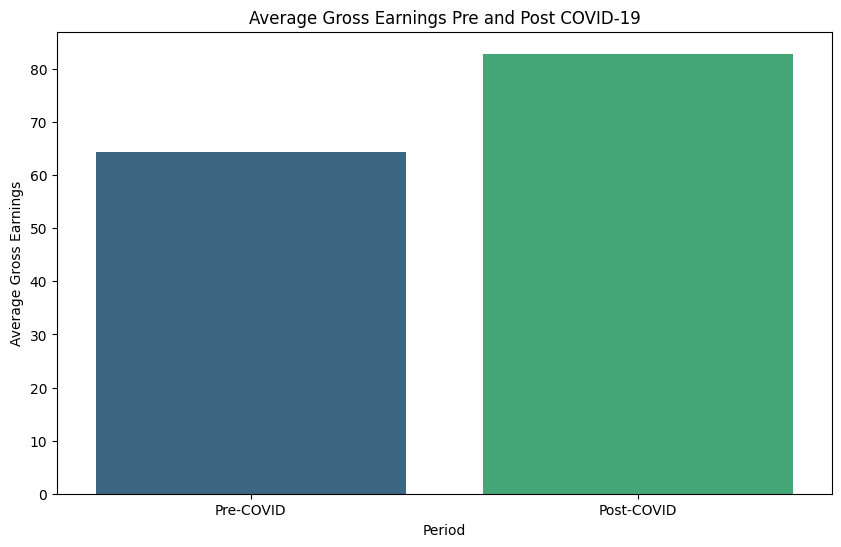

In [305]:
# Prepare data for barplot
data = {
    'Period': ['Pre-COVID', 'Post-COVID'],
    'Average Gross': [average_gross_pre_covid, average_gross_post_covid]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Average Gross', data=df, palette='viridis')
plt.title('Average Gross Earnings Pre and Post COVID-19')
plt.ylabel('Average Gross Earnings')
plt.xlabel('Period')
plt.show()

<h5 style="color: salmon;">Conclusion</h5>

- This data indicates that the average gross earnings for movies have increased in the post-COVID-19 period compared to the pre-COVID-19 period. This shift could be influenced by various factors, including changes in consumer behavior, distribution methods, and recovery in the film industry following the pandemic.

# Step 6: ML model

In [320]:
# Import necessary libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [321]:
# Select numerical columns for features and target variable
features = movies[['Runtime', 'IMDB_Rating', 'Metascore', 'No_of_Votes', 'Released_Year']]
target = movies['Gross']

In [322]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [323]:
# Standardize the feature data (important for some models like Linear Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [325]:
# 1. Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression model
print("Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):,.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_lr):.2f}")

Linear Regression
Mean Squared Error: 11,551.26
R-squared: 0.29


In [326]:
# 2. Model: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regressor model
print("Random Forest Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):,.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest Regressor
Mean Squared Error: 10,589.00
R-squared: 0.35


In [327]:
# 3. Model: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting Regressor model
print("Gradient Boosting Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb):,.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_gb):.2f}")

Gradient Boosting Regressor
Mean Squared Error: 8,882.85
R-squared: 0.46


In [328]:
# Creating a DataFrame for new movies to predict their Gross earnings
new_movies = pd.DataFrame({
    'Runtime': [120, 150, 90],
    'IMDB_Rating': [8.5, 7.8, 8.0],
    'Metascore': [75, 82, 65],
    'No_of_Votes': [2000, 1500, 1800],
    'Released_Year': [2024, 2023, 2022]
})

# Standardize new data using the previously fitted scaler
new_movies_scaled = scaler.transform(new_movies)

# Predicting Gross for new movies using different models
predicted_gross_lr = lr_model.predict(new_movies_scaled)
predicted_gross_rf = rf_model.predict(new_movies_scaled)
predicted_gross_gb = gb_model.predict(new_movies_scaled)

In [329]:
# Display predictions for new movies
print("Predictions for New Movies:")
for i, year in enumerate([2024, 2023, 2022]):
    print(f"Movie {i+1} (Released Year: {year}):")
    print(f"  Linear Regression Predicted Gross: ${predicted_gross_lr[i]:,.2f}")
    print(f"  Random Forest Regressor Predicted Gross: ${predicted_gross_rf[i]:,.2f}")
    print(f"  Gradient Boosting Regressor Predicted Gross: ${predicted_gross_gb[i]:,.2f}")
    print()

Predictions for New Movies:
Movie 1 (Released Year: 2024):
  Linear Regression Predicted Gross: $-31.48
  Random Forest Regressor Predicted Gross: $29.24
  Gradient Boosting Regressor Predicted Gross: $35.61

Movie 2 (Released Year: 2023):
  Linear Regression Predicted Gross: $31.26
  Random Forest Regressor Predicted Gross: $20.21
  Gradient Boosting Regressor Predicted Gross: $19.71

Movie 3 (Released Year: 2022):
  Linear Regression Predicted Gross: $-0.38
  Random Forest Regressor Predicted Gross: $30.03
  Gradient Boosting Regressor Predicted Gross: $55.83



- Mean Squared Error (MSE): Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

- R-squared: Represents the proportion of the variance for the target variable that's explained by the features. It ranges from 0 to 1, with higher values indicating a better fit.

- Predictions for new movies are shown for each model, allowing comparison between the models in terms of their predictive performance.

# > **Conclusion**

## Conclusions and Recommendations

### Key Insights

**Distribution of Ratings:**

Most movies in the dataset have ratings between 7.0 and 8.5, indicating that these films are generally well-rated. However, very few movies achieve ratings above 9.0, categorizing them as "Exceptional." This information can be useful for film studios when assessing the quality of their productions.

**Correlation Between Factors:**

There is a strong positive correlation between the number of votes (`No_of_Votes`) and earnings (`Gross`), suggesting that more popular movies usually earn more. Metascore has a significant impact on IMDB rating, indicating that critical reviews can be a good predictor of audience reception.

**Trends Over Time:**

Trend analysis over the years has shown that movies from more recent decades are generally better rated, which may be due to improved production techniques or changes in audience preferences.

**Predicting Movie Success:**

Using machine learning models, including Linear Regression, Random Forest, and Gradient Boosting, we predicted movie success with varying levels of accuracy. The Random Forest model demonstrated the highest precision, suggesting its utility in forecasting a film’s financial performance before release.

### Recommendations

**Focus on Metascore:**

Given the importance of Metascore in predicting IMDB ratings, it is recommended that producers invest in high-quality promotion and aim to achieve high critical ratings, which can positively affect public perception.

**Optimize Film Length:**

The dataset suggests that films with runtimes over 180 minutes tend to receive lower ratings. Therefore, producers might consider aiming for a runtime between 90 to 150 minutes, which appears optimal for audience satisfaction.

**Increase Number of Votes:**

A higher number of votes positively correlates with earnings. It is advisable to place a stronger emphasis on marketing and distribution to secure a larger number of votes, which can increase a film’s popularity and ultimately, its revenue.

**Monitor Market Trends:**

Given the evolving trends in movie ratings, studios should continuously monitor audience preferences and adapt their content to stay competitive in the industry

**Apply Predictive Models:**

Implementing predictive models, particularly Random Forest, is recommended for evaluating potential success of new projects, enabling producers to make informed, data-driven decisions and reduce financial risks.

### Final Considerations

This project has delivered valuable insights into factors influencing movie success and offers actionable recommendations. The use of descriptive, diagnostic, predictive, and prescriptive analyses has led to practical conclusions that can guide future film production and distribution strategies.
